In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [2]:
data = pd.read_csv('weatherAUS.csv')
pd.set_option("display.max_columns", None)   #to display all the fields
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in data.columns if feature not in numerical_features]
print("no. of Numerical features: ",len(numerical_features))
print("no. of Discrete features: ",len(discrete_features))
print("no. of Continous features: ",len(continous_features))
print("no. of Categorical features: ",len(categorical_features))

no. of Numerical features:  16
no. of Discrete features:  2
no. of Continous features:  14
no. of Categorical features:  7


## Handling Missing Values 

In [4]:
data.isnull().sum()*100/len(data)   #getting % nan values for each feature

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [5]:
data['Cloud9am'].head()

0    8.0
1    NaN
2    NaN
3    NaN
4    7.0
Name: Cloud9am, dtype: float64

In [6]:
# getting random samples of features having nan values and making them non null by using this random samples function  
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [7]:
randomsampleimputation(data,'Cloud9am')
randomsampleimputation(data,'Cloud3pm')
randomsampleimputation(data,'Sunshine')
randomsampleimputation(data,'Evaporation')

In [8]:
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

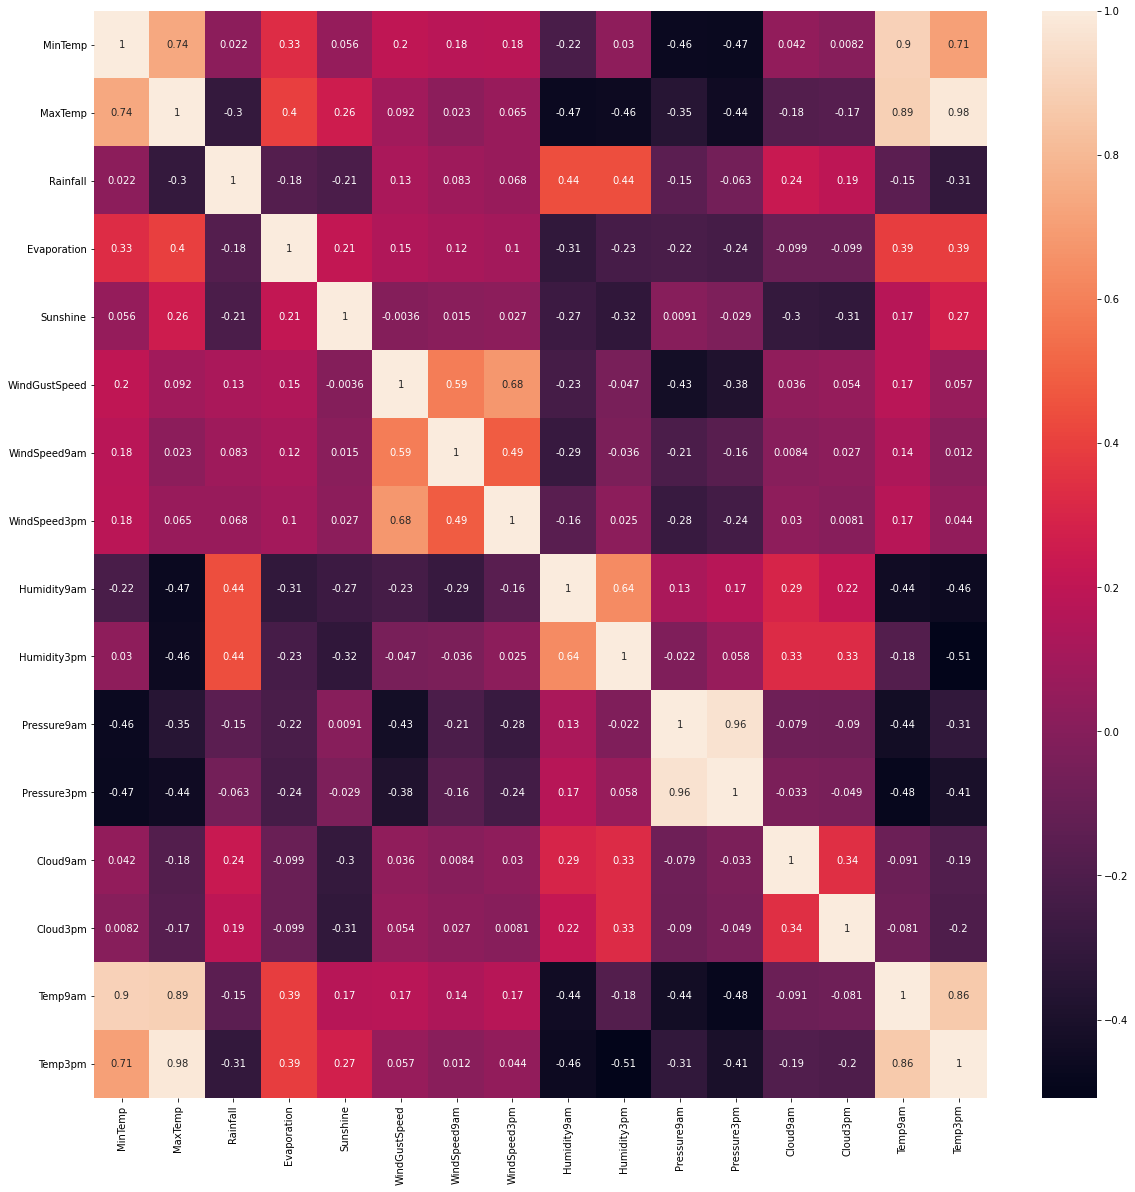

In [9]:
import seaborn as sns
corrmat =data.corr(method = 'spearman')
plt.figure(figsize=(20,20))
#plotting heatmap
g=sns.heatmap(corrmat,annot=True)

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


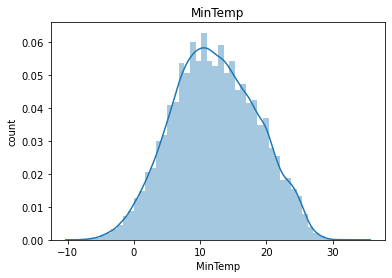

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


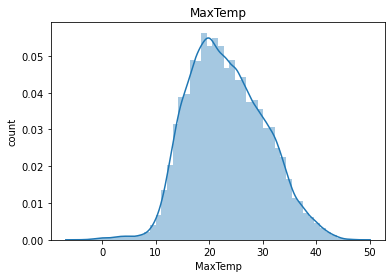

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


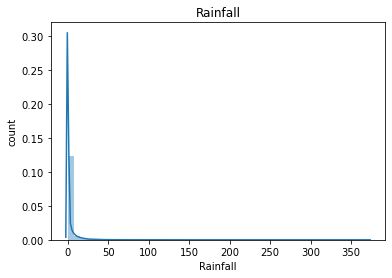

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


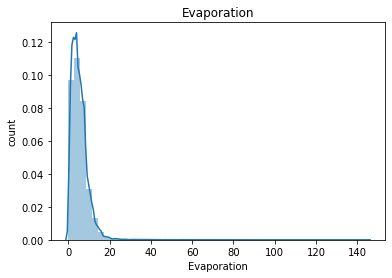

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


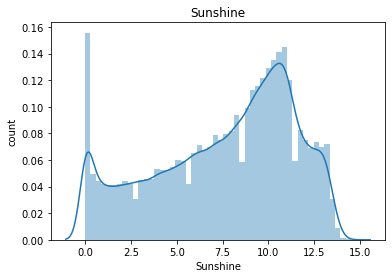

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


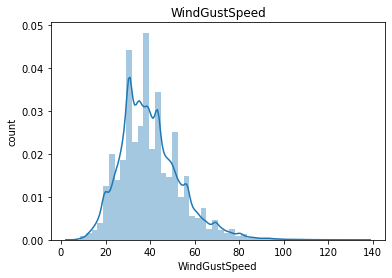

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


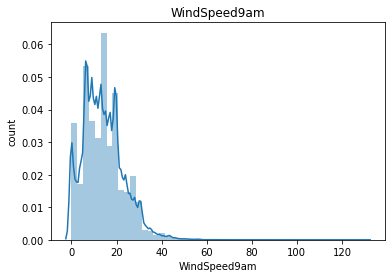

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


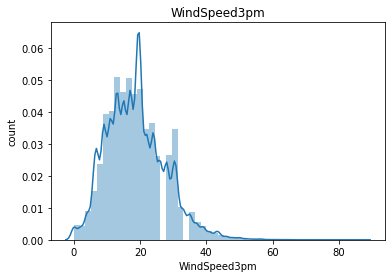

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


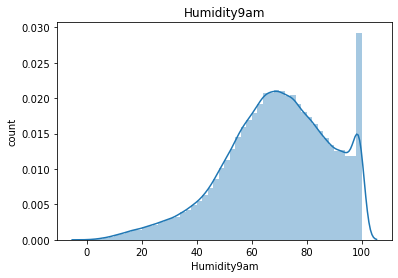

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


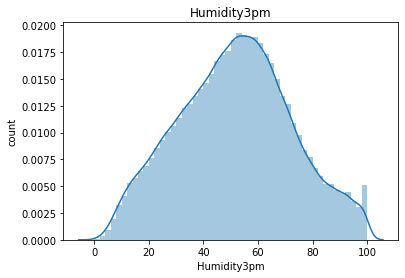

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


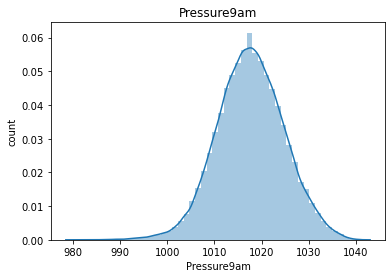

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


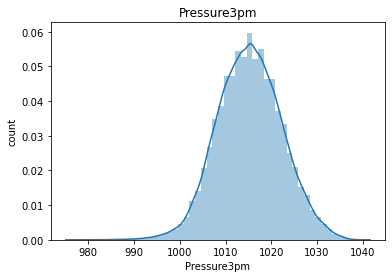

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


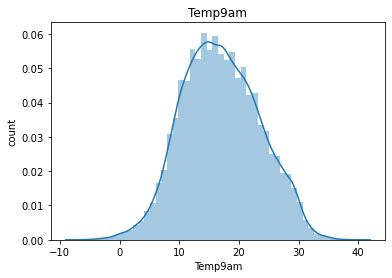

<Figure size 1080x1080 with 0 Axes>

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


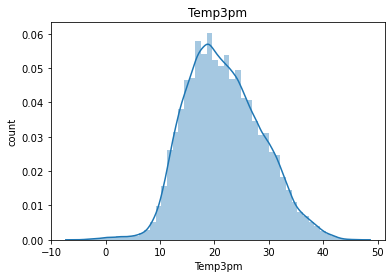

<Figure size 1080x1080 with 0 Axes>

In [10]:
# plotting distribution of each feature in data

for feature in continous_features:
    df = data.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\li

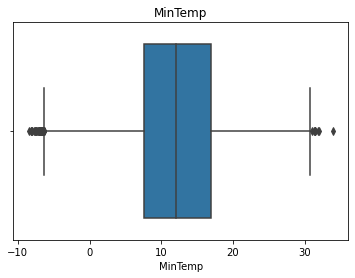

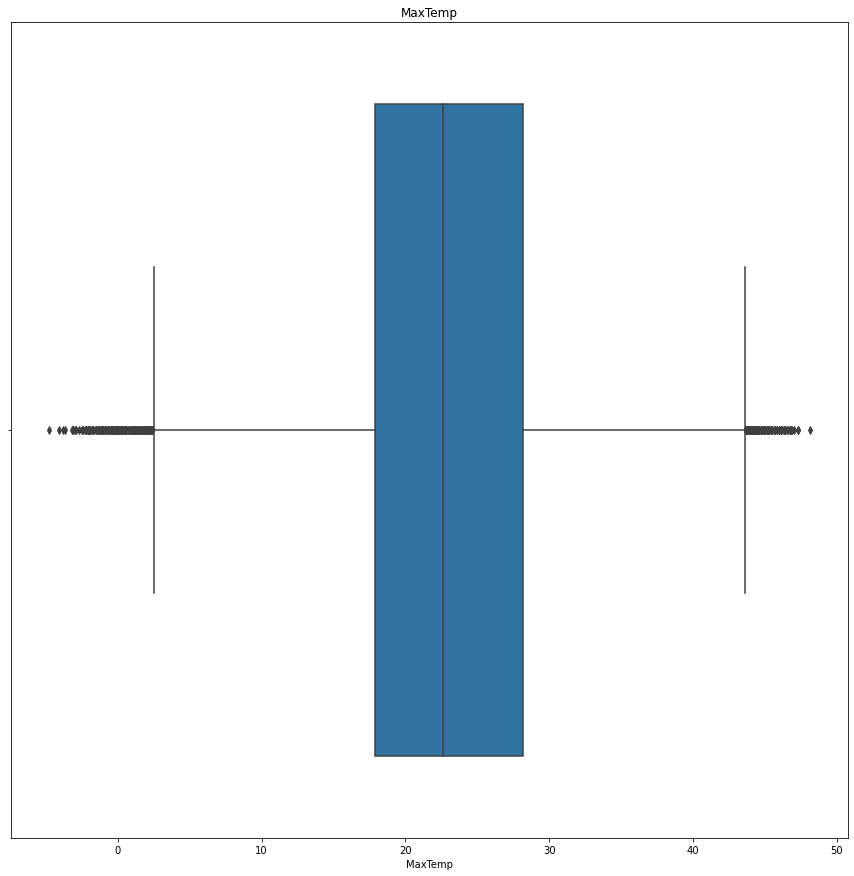

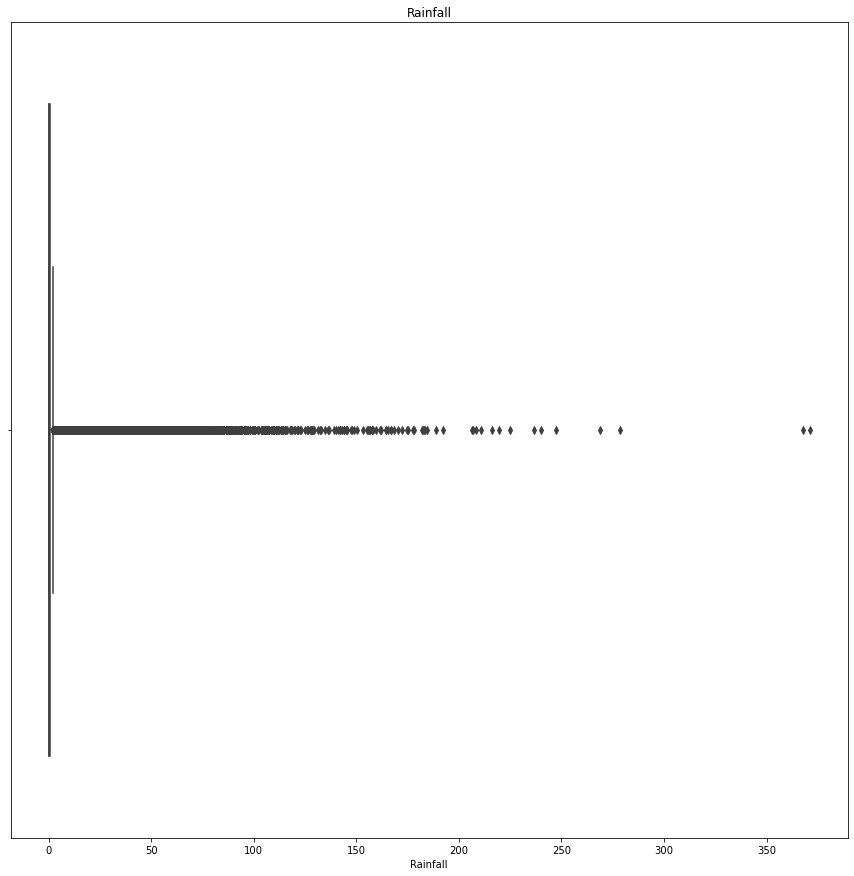

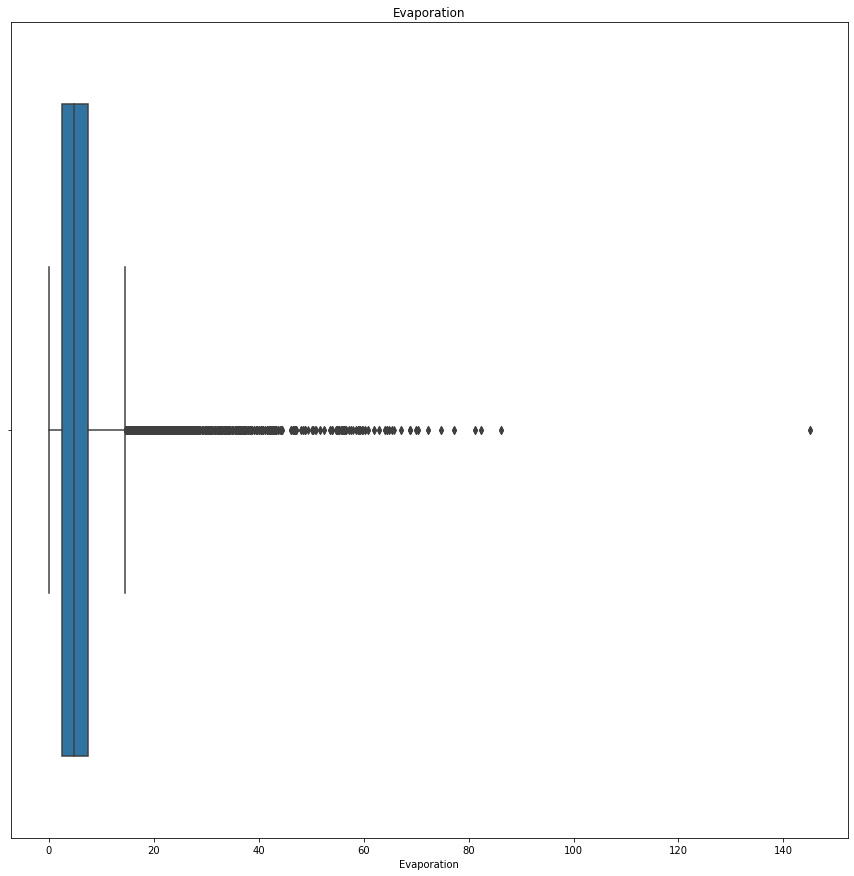

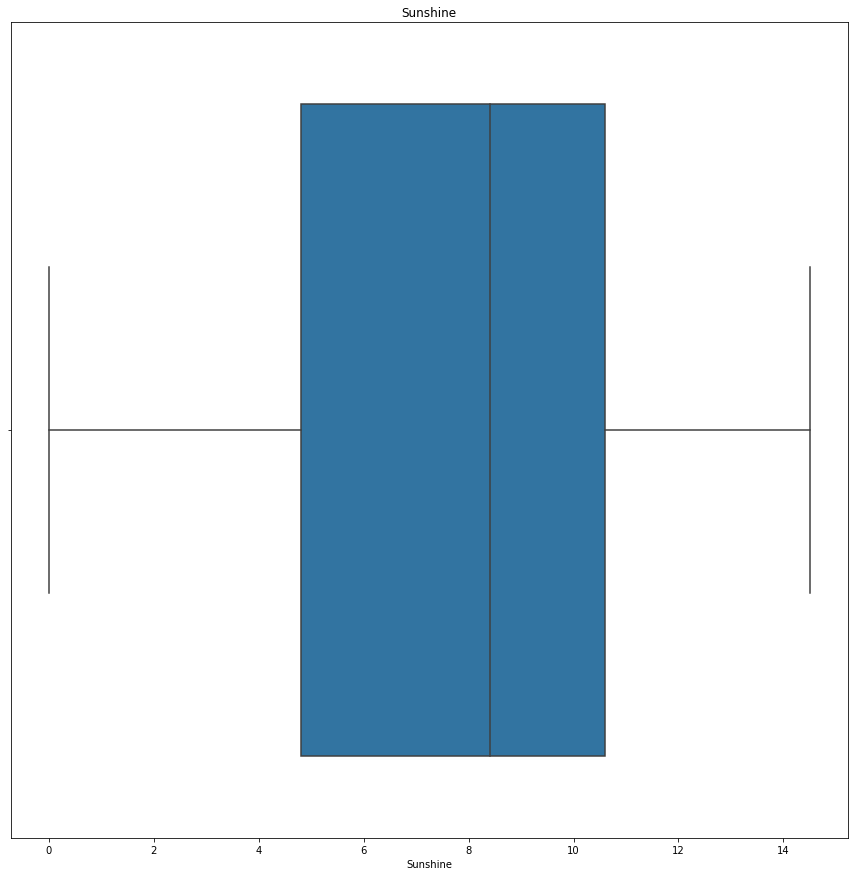

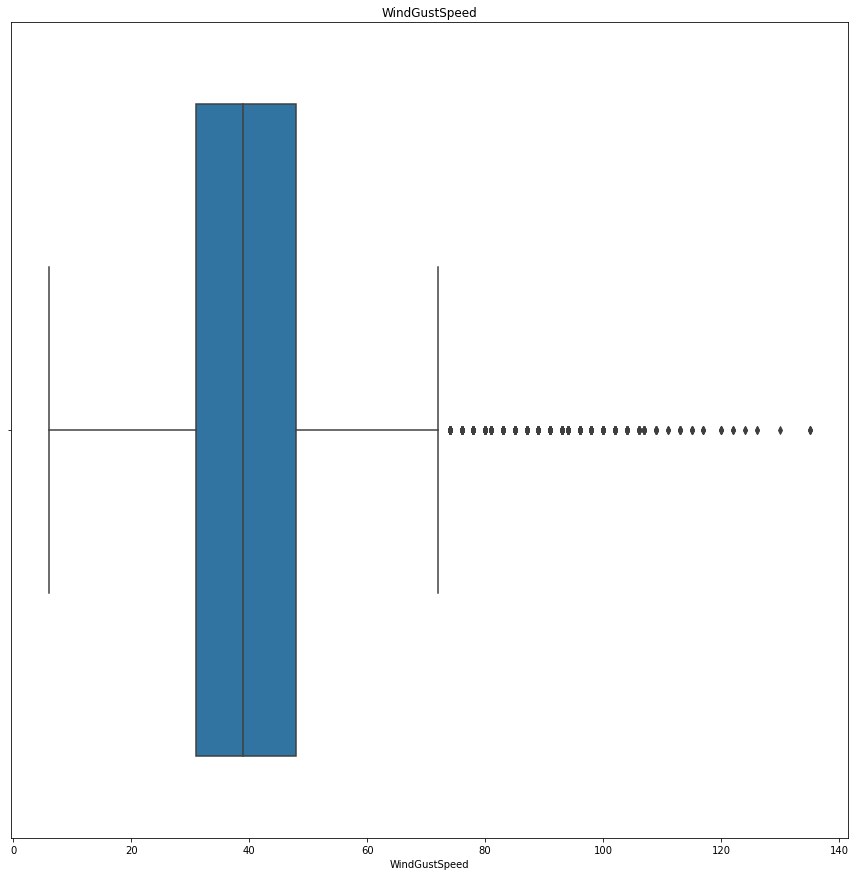

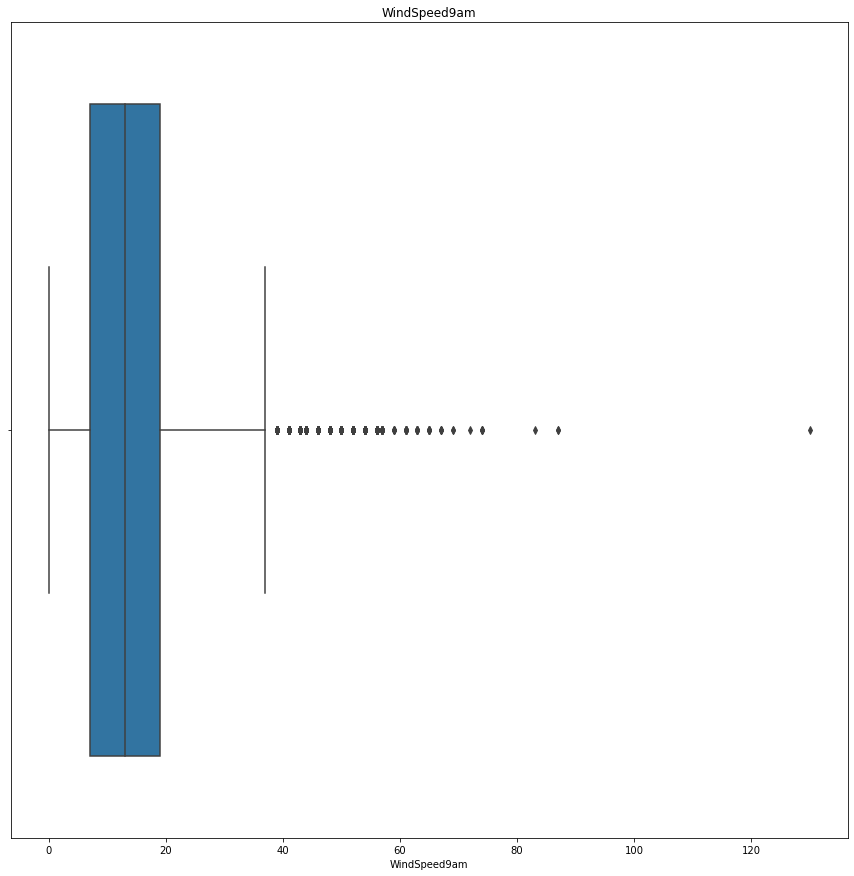

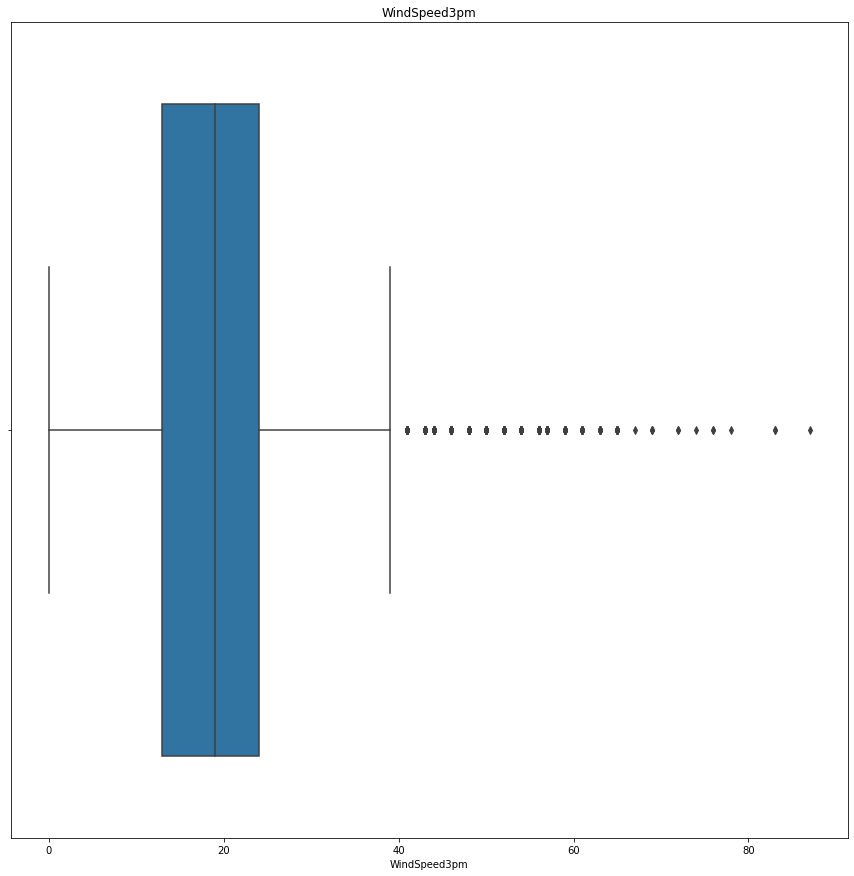

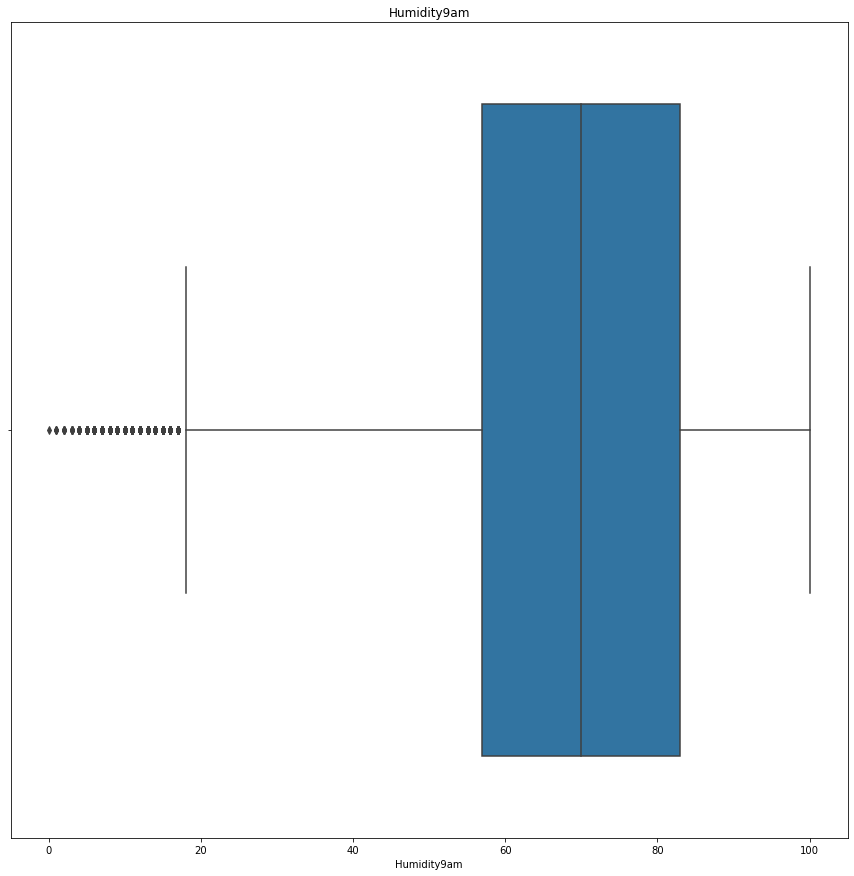

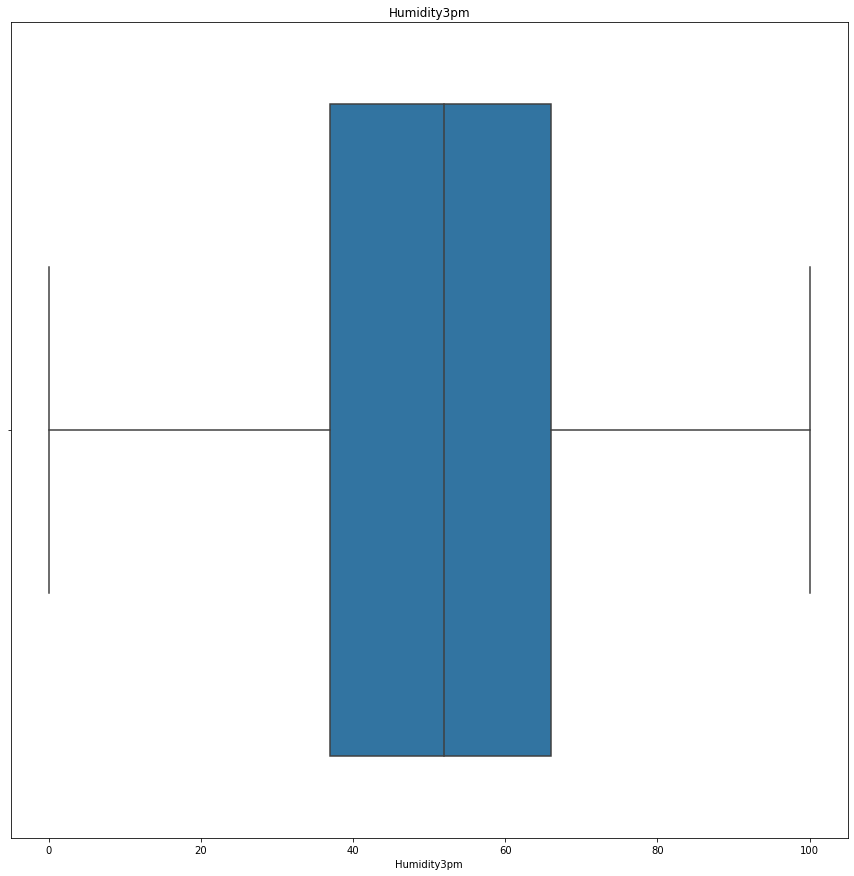

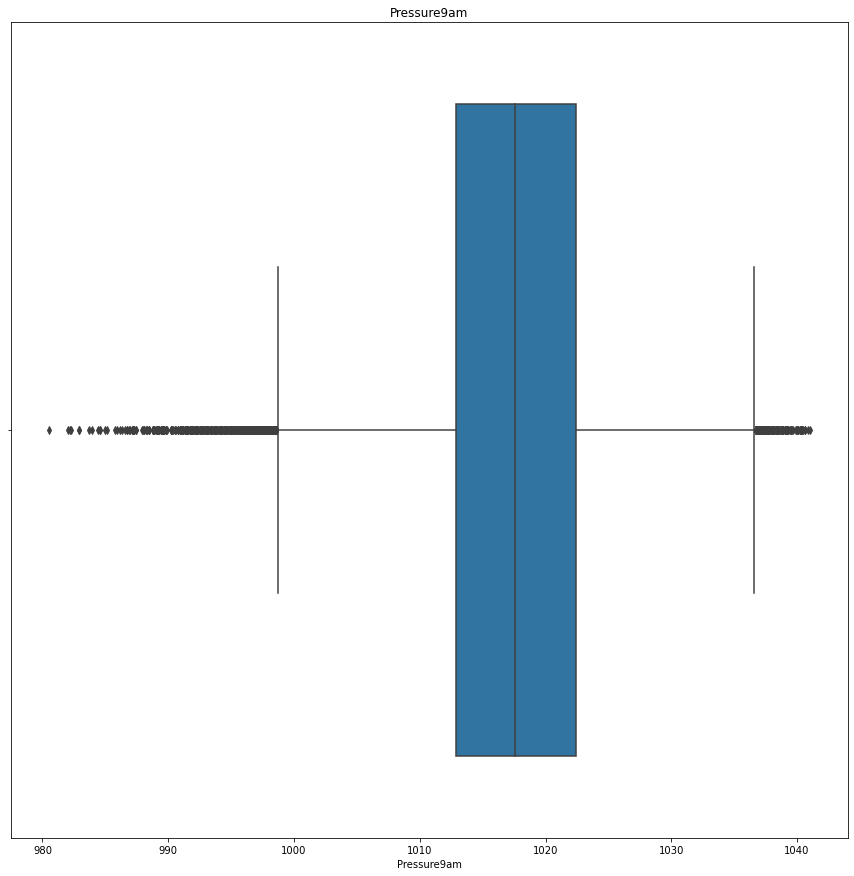

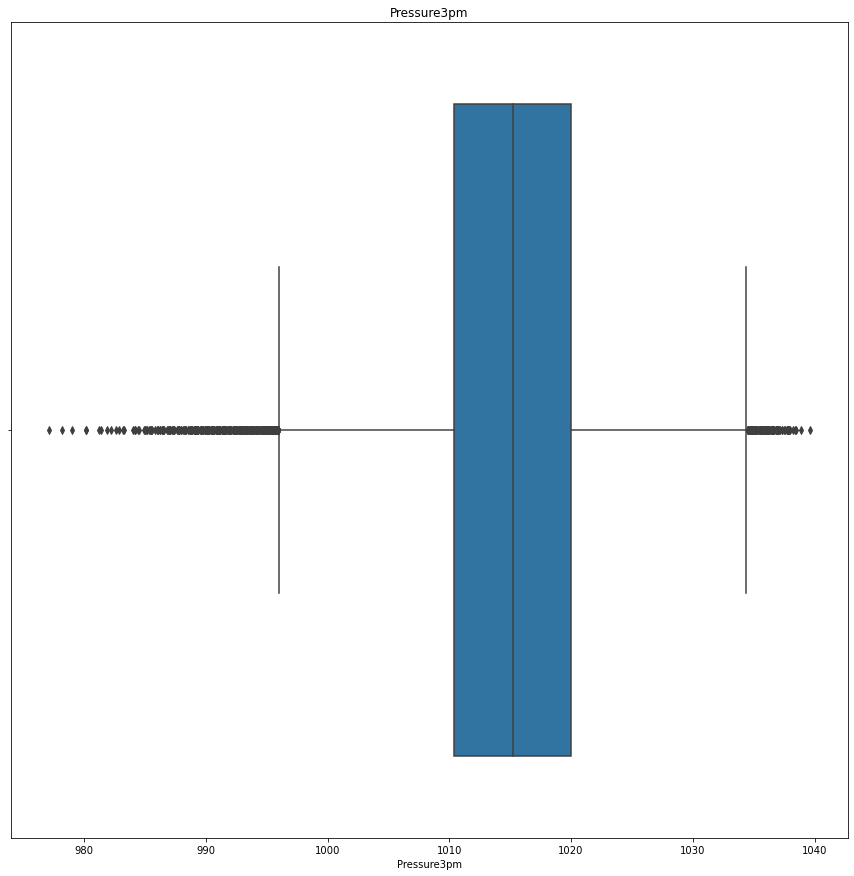

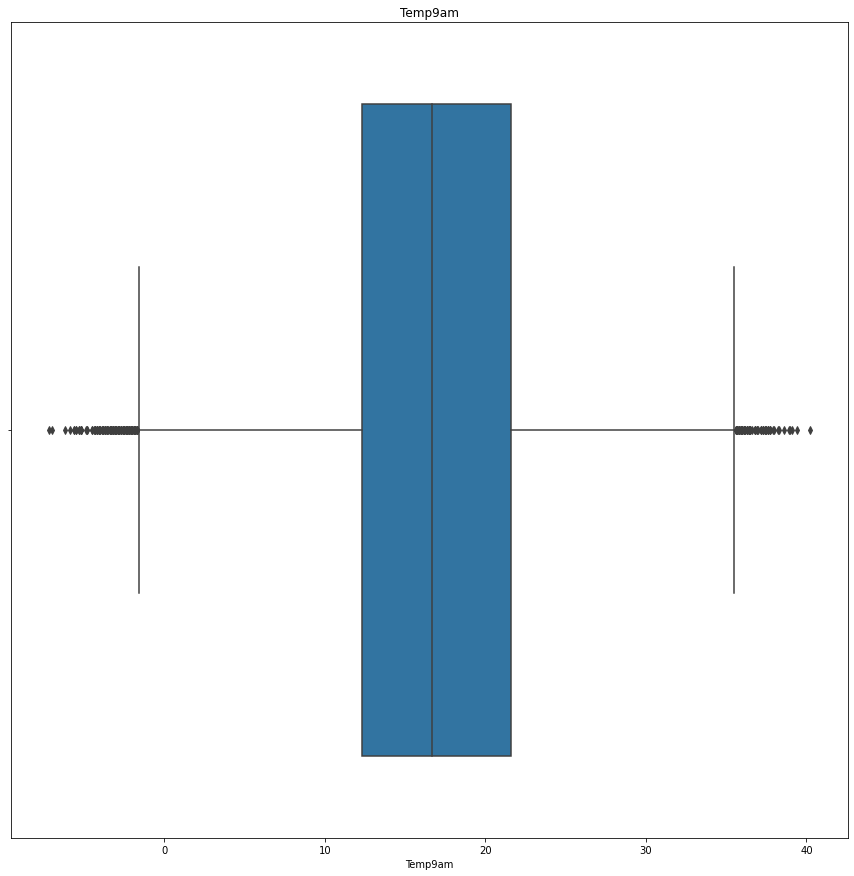

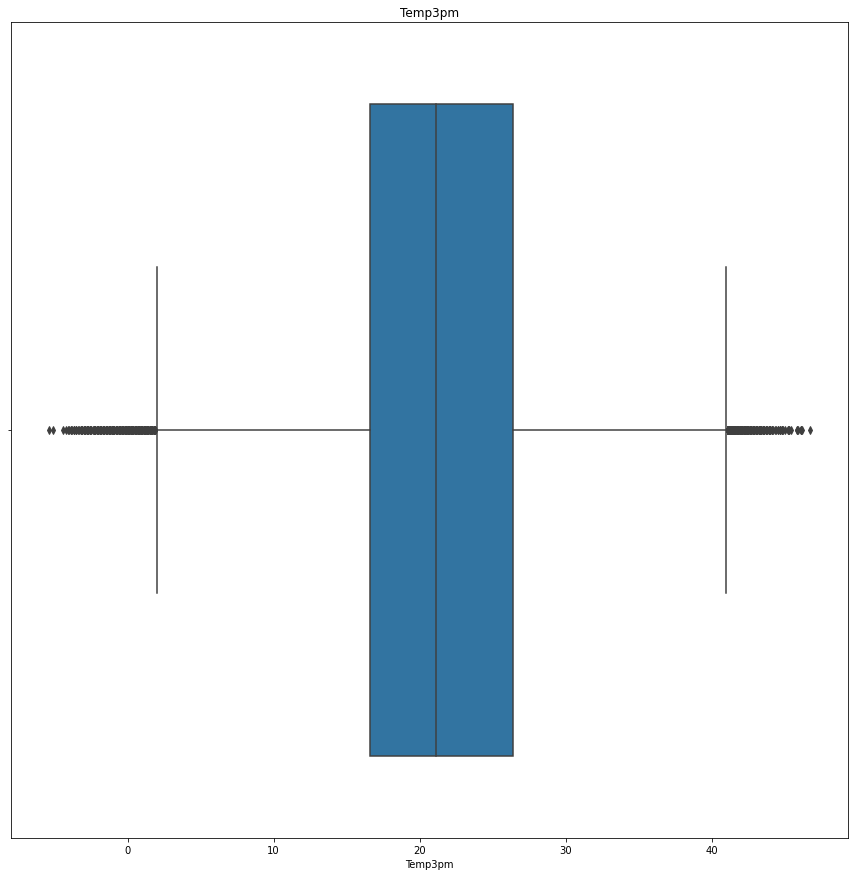

<Figure size 1080x1080 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continous_features:
    df=data.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
# replacing null values with median
for feature in continous_features:
    if(data[feature].isnull().sum()*100/len(data))>0:
        data[feature] = data[feature].fillna(data[feature].median())

In [13]:
data.isnull().sum()*100/len(data)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [14]:
discrete_features

['Cloud9am', 'Cloud3pm']

In [15]:
#getting mode for discrete features and replace nan values with mode..
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0] #getting highest mode value using index[0]
    df[variable].fillna(mode,inplace=True)

mode_nan(data,"Cloud9am")
mode_nan(data,"Cloud3pm")

In [16]:
data[['Cloud9am','Cloud3pm']]

,Cloud9am,Cloud3pm
0,8.0,0.0
1,7.0,1.0
2,8.0,2.0
3,0.0,5.0
4,7.0,8.0
...,...,...
145455,1.0,1.0
145456,8.0,5.0
145457,8.0,1.0
145458,3.0,2.0


In [17]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [18]:
data['RainToday'] = pd.get_dummies(data['RainToday'],drop_first=True)
data['RainTomorrow'] = pd.get_dummies(data['RainTomorrow'],drop_first=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,02-12-2008,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,03-12-2008,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,04-12-2008,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,05-12-2008,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [19]:
for feature in categorical_features:
    print(feature, (data.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)
    


Date Index(['01-11-2007', '07-03-2008', '13-04-2008', '22-11-2007', '28-02-2008',
       '03-11-2007', '19-01-2008', '16-12-2007', '27-12-2007', '03-12-2007',
       ...
       '04-04-2008', '20-11-2012', '20-11-2007', '04-05-2008', '20-05-2008',
       '20-03-2008', '20-01-2008', '19-11-2007', '19-10-2012', '01-01-2008'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [20]:
#values mapping strings are converted into nums
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [21]:
data[["WindGustDir","WindDir9am",'WindDir3pm']]

,WindGustDir,WindDir9am,WindDir3pm
0,4.0,5.0,3.0
1,2.0,0.0,6.0
2,5.0,5.0,6.0
3,11.0,13.0,14.0
4,4.0,12.0,0.0
...,...,...,...
145455,15.0,13.0,13.0
145456,0.0,13.0,2.0
145457,3.0,13.0,3.0
145458,12.0,11.0,2.0


In [22]:
#handling categorical missing values using mode
data["WindGustDir"] = data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"] = data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"] = data["WindDir3pm"].fillna(data["WindDir3pm"].value_counts().index[0])

In [23]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
df1 =data.groupby(['Location'])['RainTomorrow'].value_counts().sort_values().unstack()

In [25]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [26]:
df1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [27]:
len(df1[1].sort_values(ascending = False).index)

49

In [28]:
# got descending locations order and mapping them
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
data["Location"] = data["Location"].map(location)

In [29]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,02-12-2008,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,03-12-2008,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,04-12-2008,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,05-12-2008,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,22-06-2017,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,23-06-2017,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,24-06-2017,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [30]:
data['Date'] = pd.to_datetime(data["Date"], format = "%d-%m-%Y", errors = "coerce")

In [31]:
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [32]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


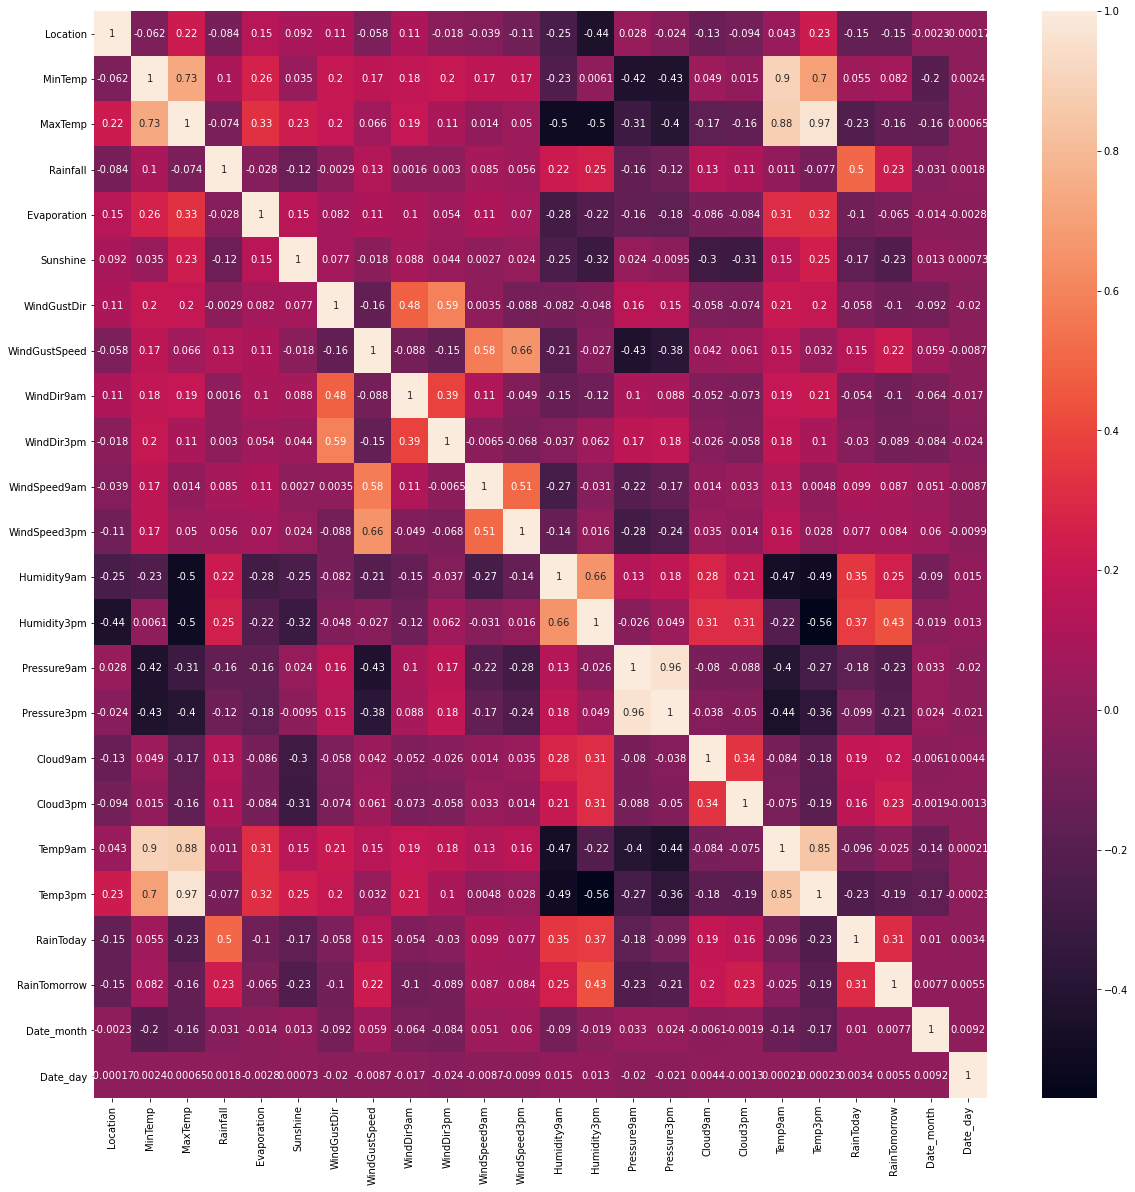

In [33]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

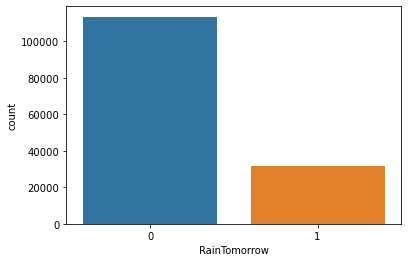

In [34]:
sns.countplot(data["RainTomorrow"])

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\li

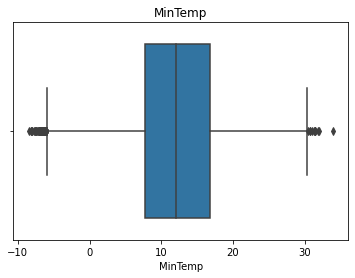

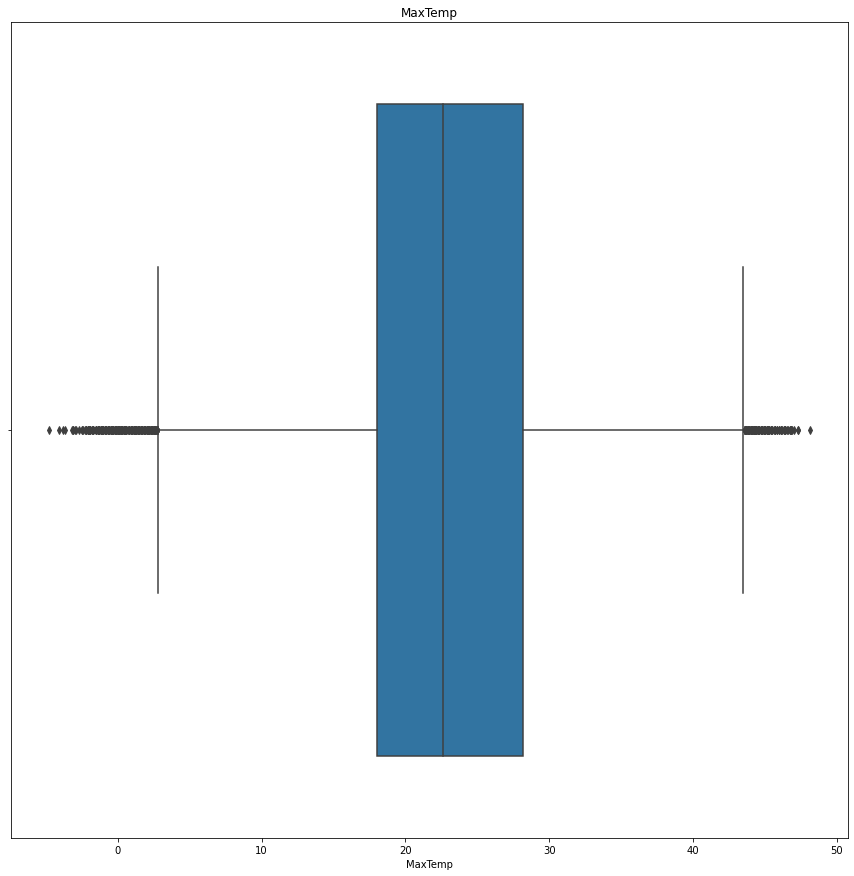

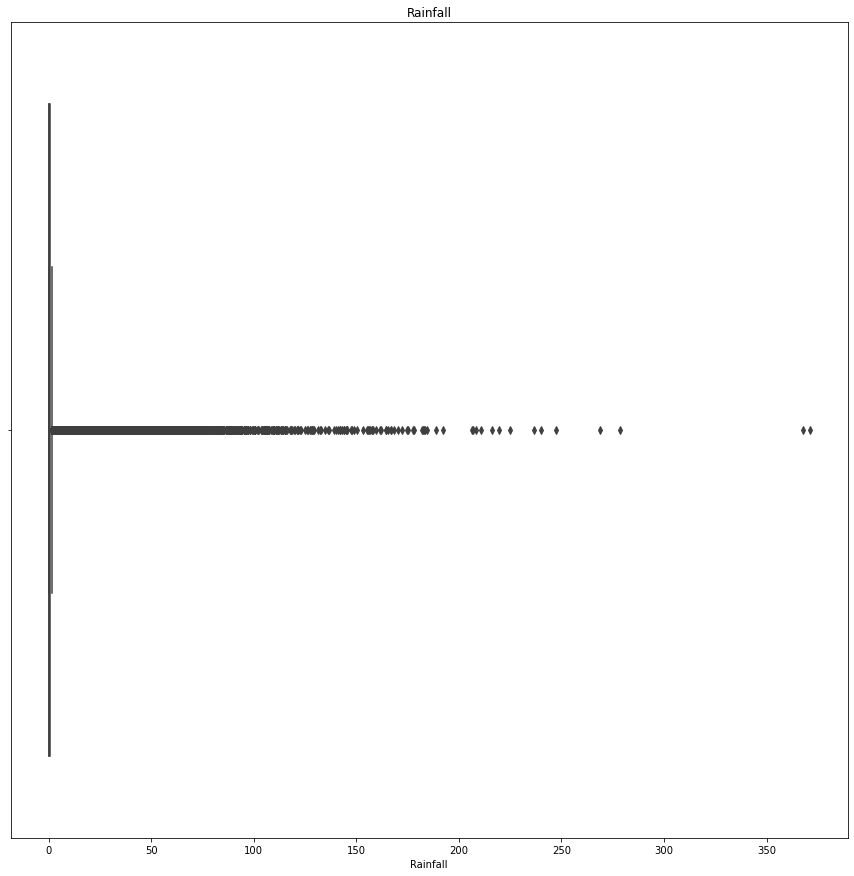

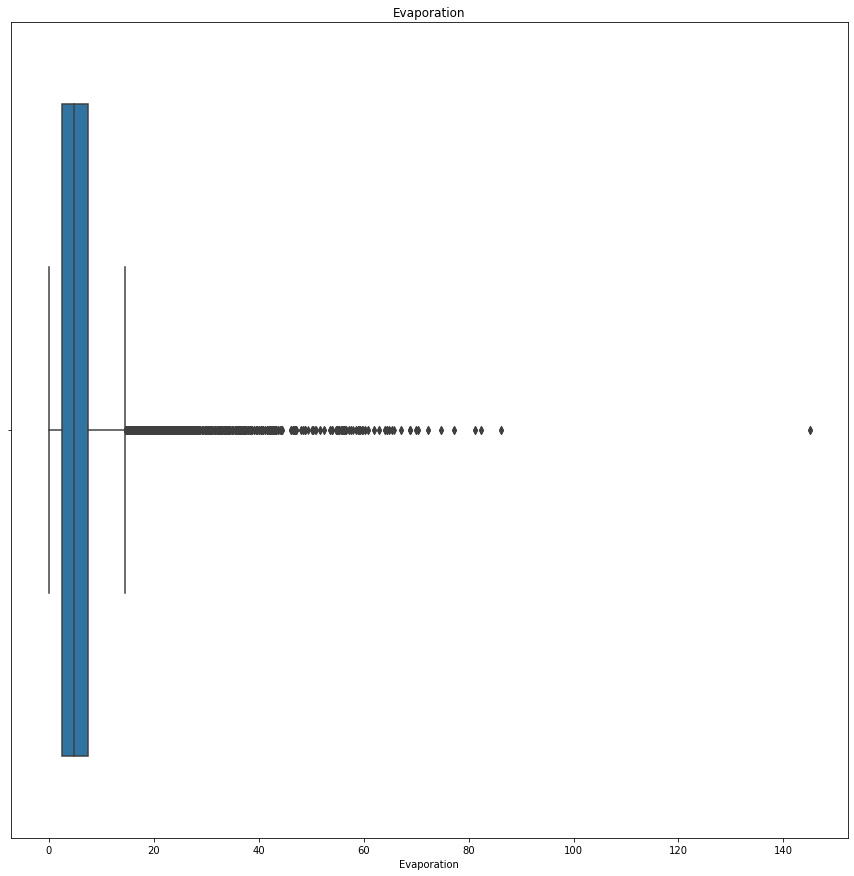

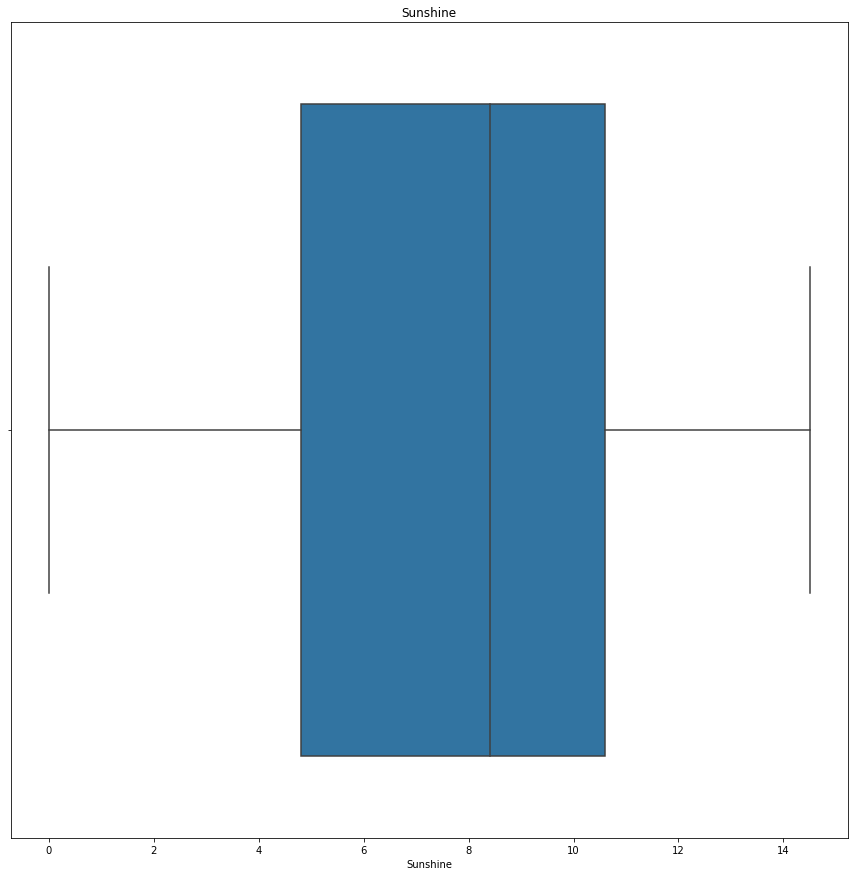

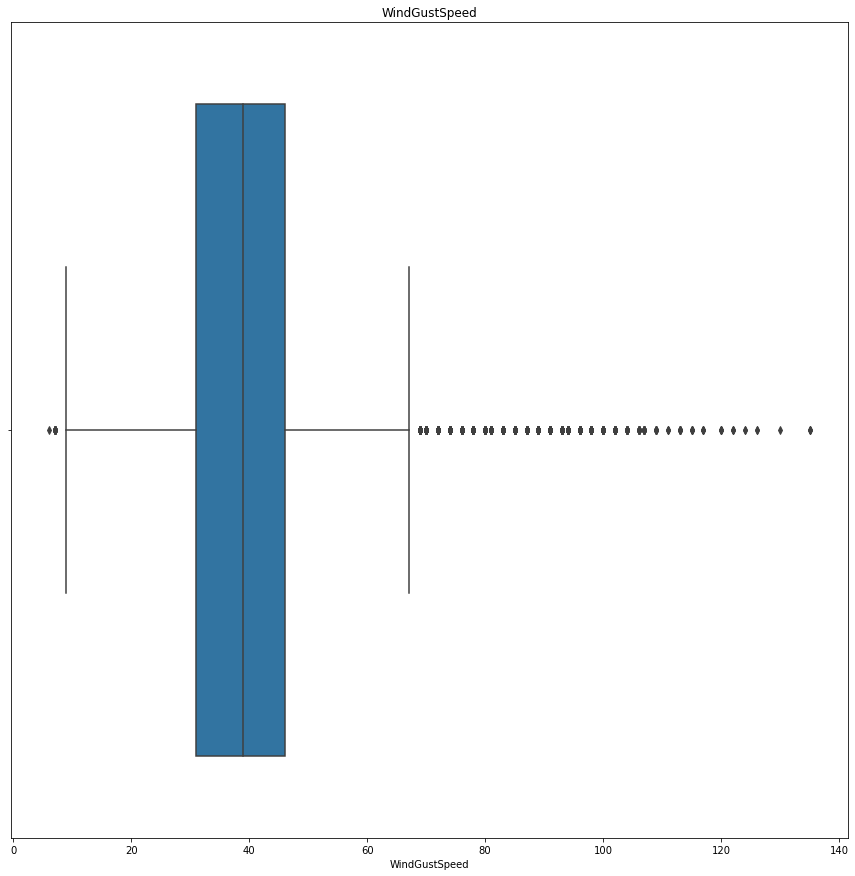

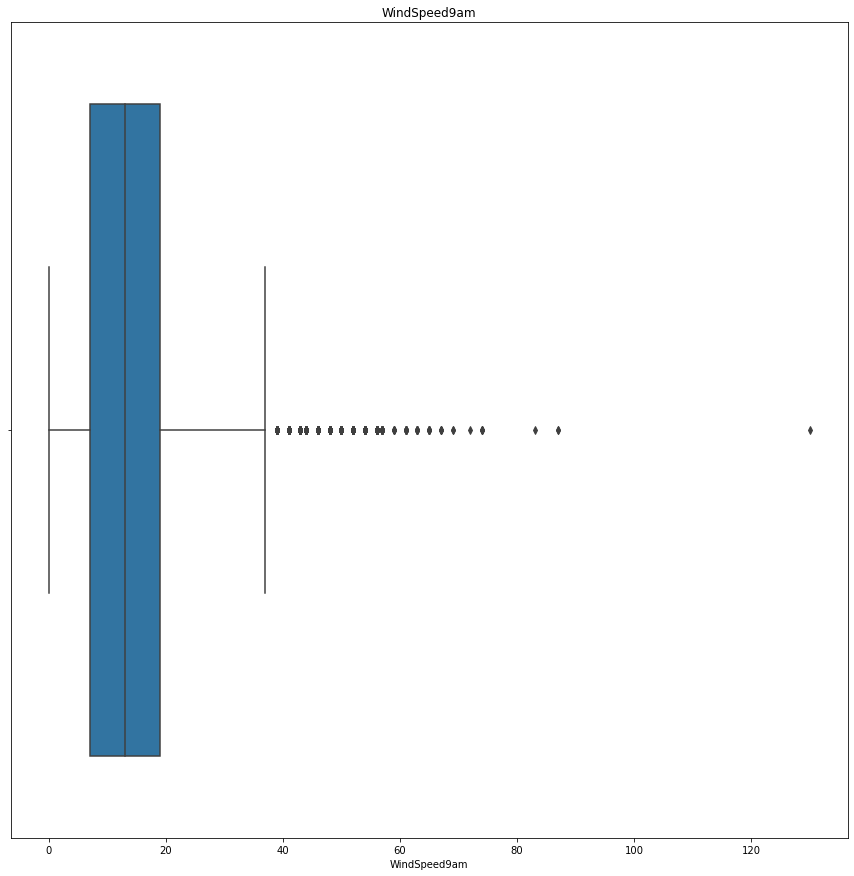

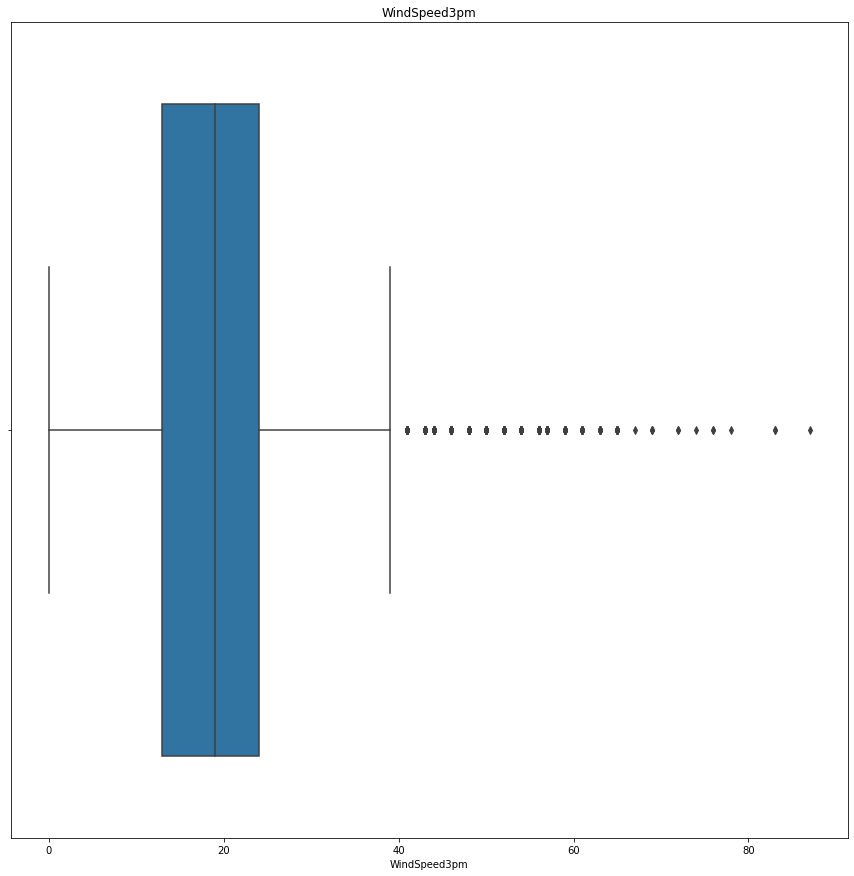

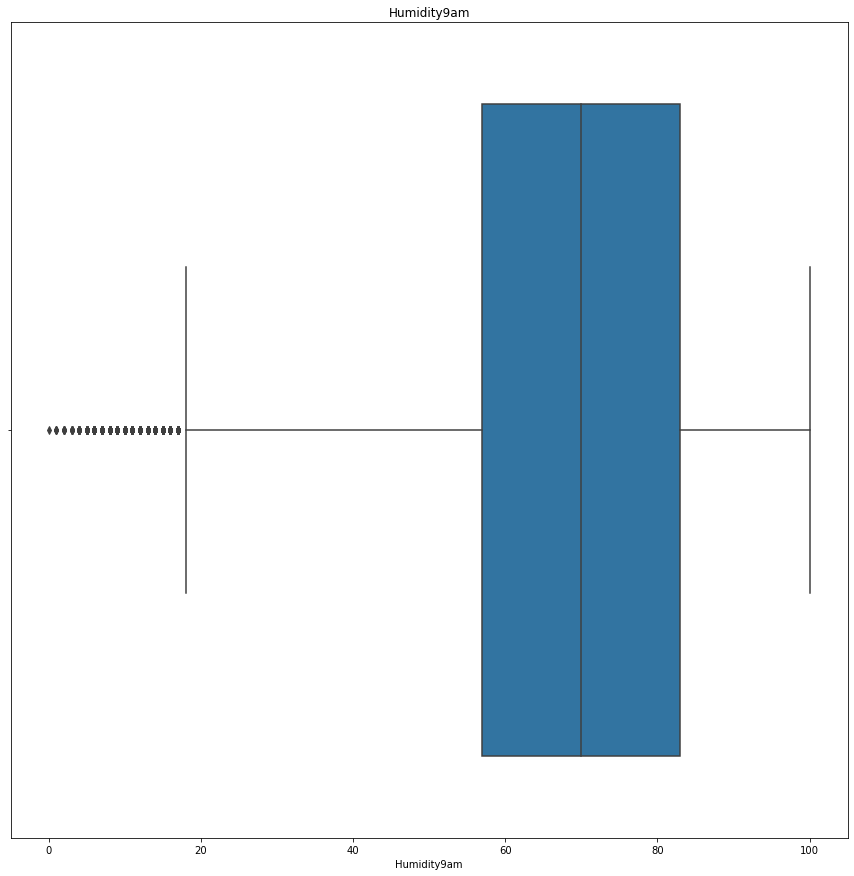

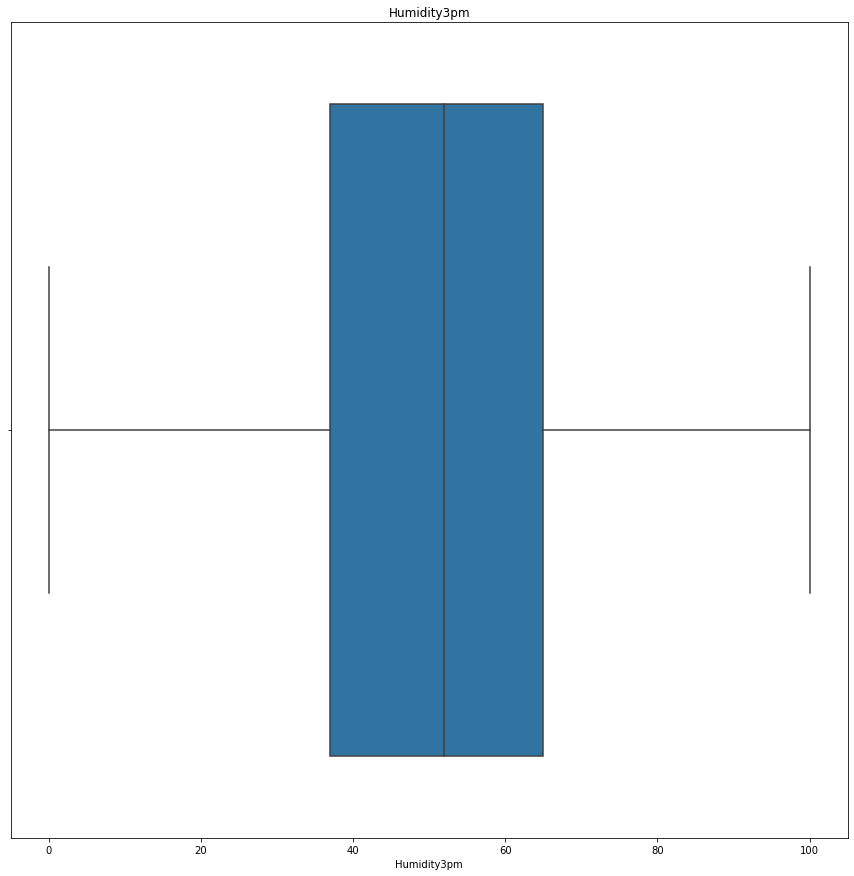

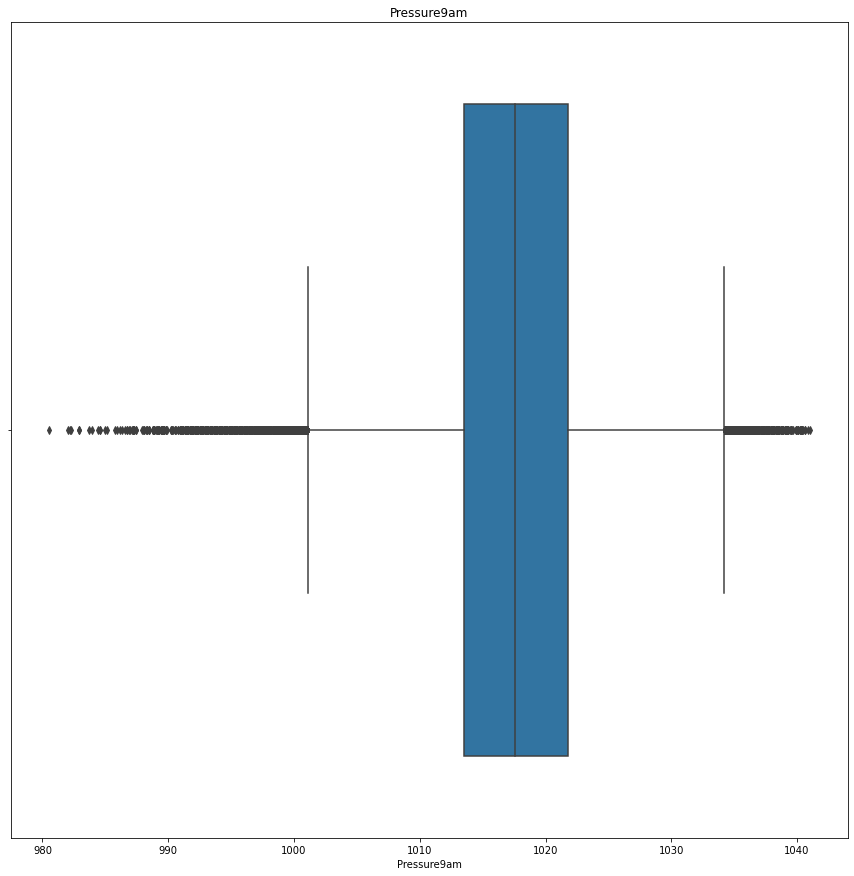

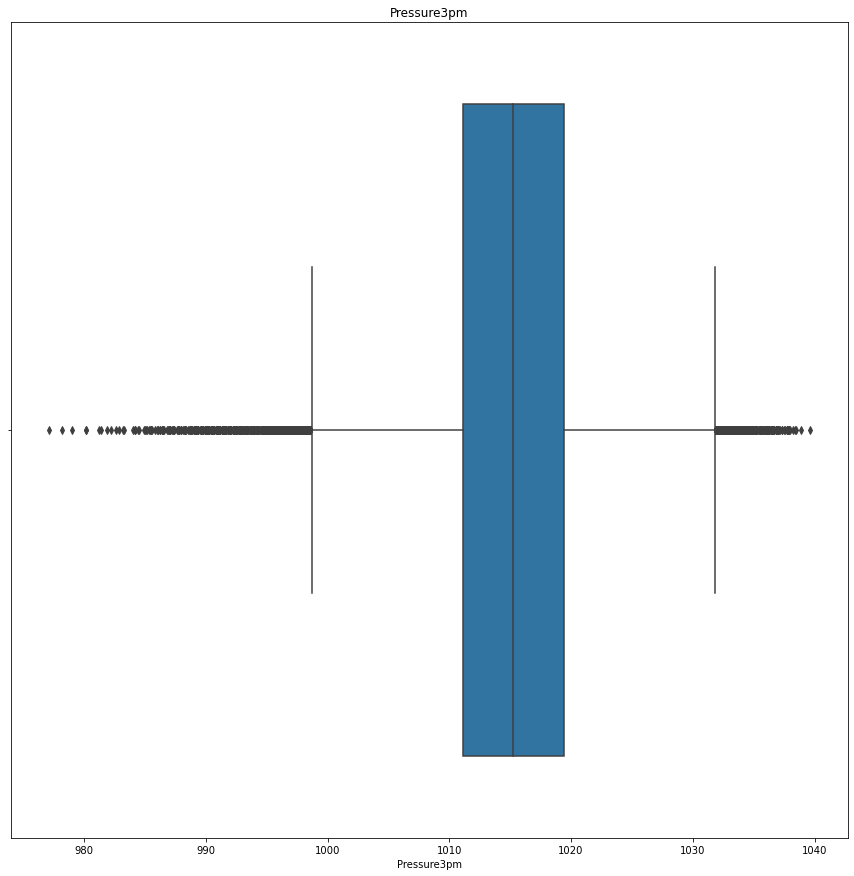

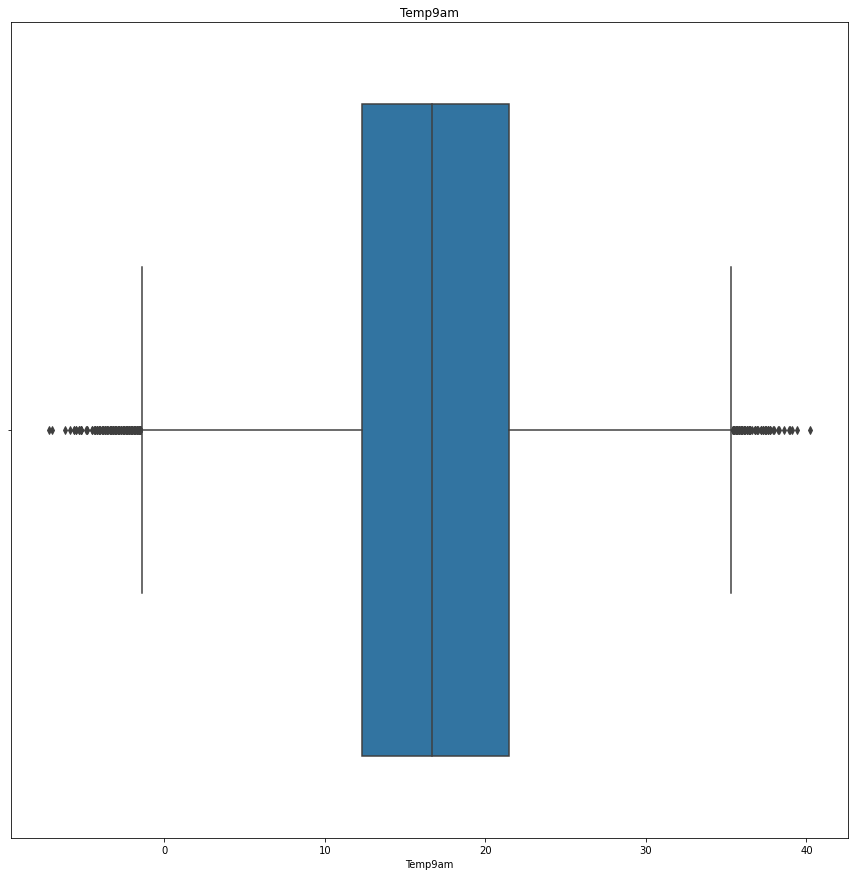

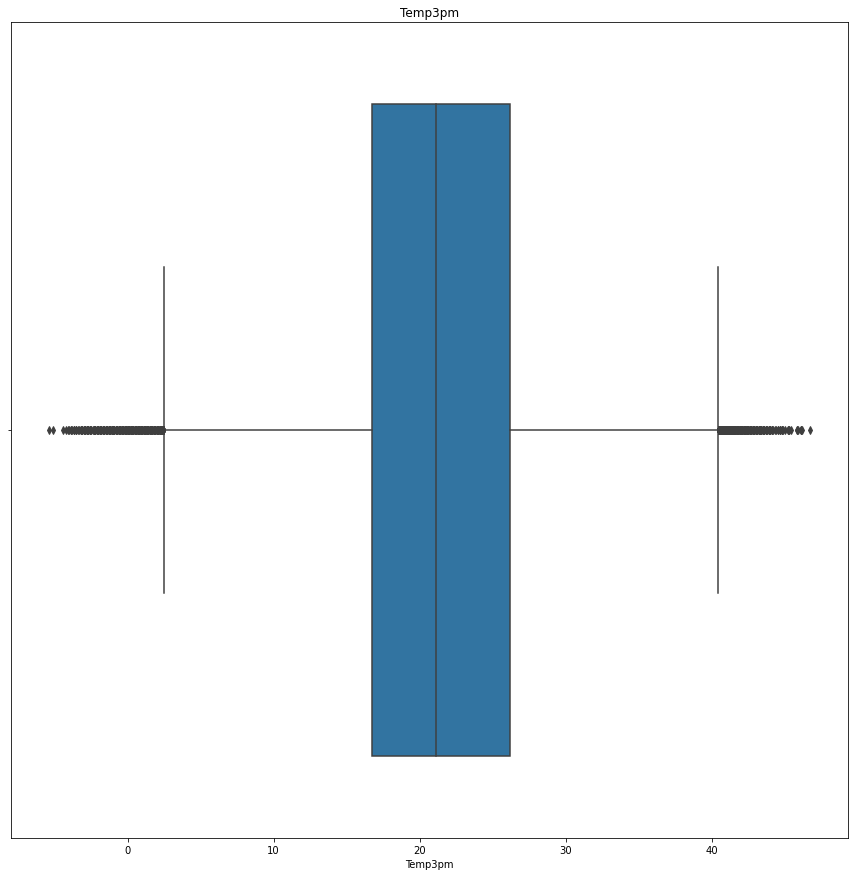

<Figure size 1080x1080 with 0 Axes>

In [35]:
# plotting for continous features
for feature in continous_features:
    df=data.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [36]:
continous_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [37]:
# interquartile rule to reduce outliers effect
IQR=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_bridge=data.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [38]:
data.loc[data['MinTemp']>=30.45,'MinTemp']=30.45
data.loc[data['MinTemp']<=-5.95,'MinTemp']=-5.95

In [39]:
IQR=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_bridge=data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [40]:
data.loc[data['MaxTemp']>=43.5,'MaxTemp']=43.5
data.loc[data['MaxTemp']<=2.7,'MaxTemp']=2.7

In [41]:
IQR=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_bridge=data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [42]:
data.loc[data['Rainfall']>=1.5,'Rainfall']=1.5
data.loc[data['Rainfall']<=-0.89,'Rainfall']=-0.89

In [43]:
IQR=data.Evaporation.quantile(0.75)-data.Evaporation.quantile(0.25)
lower_bridge=data.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [44]:
data.loc[data['Evaporation']>=14.6,'Evaporation']=14.6
data.loc[data['Evaporation']<=-4.6,'Evaporation']=-4.6

In [45]:
IQR=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_bridge=data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [46]:
data.loc[data['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
data.loc[data['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [47]:
IQR=data.WindSpeed9am.quantile(0.75)-data.WindSpeed9am.quantile(0.25)
lower_bridge=data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [48]:
data.loc[data['WindSpeed9am']>=37,'WindSpeed9am']=37
data.loc[data['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [49]:
IQR=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_bridge=data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [50]:
data.loc[data['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
data.loc[data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [51]:
data.WindSpeed3pm.quantile(0.75)

24.0

In [52]:
def iqr(data,features):
    for feature in features:
        data[feature] = data[feature]
        iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
        lower_bridge=data[feature].quantile(0.25)-(iqr*1.5)
        upper_bridge=data[feature].quantile(0.75)+(iqr*1.5)
        
        data.loc[data[feature]>=upper_bridge,feature]=upper_bridge
        data.loc[data[feature]<=lower_bridge,feature]=lower_bridge   

In [53]:
iqr(data,continous_features)

C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SURESH\anaconda3\li

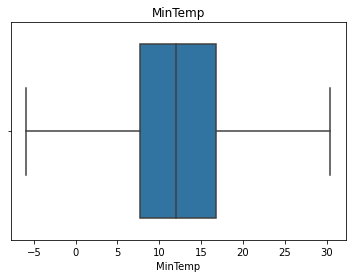

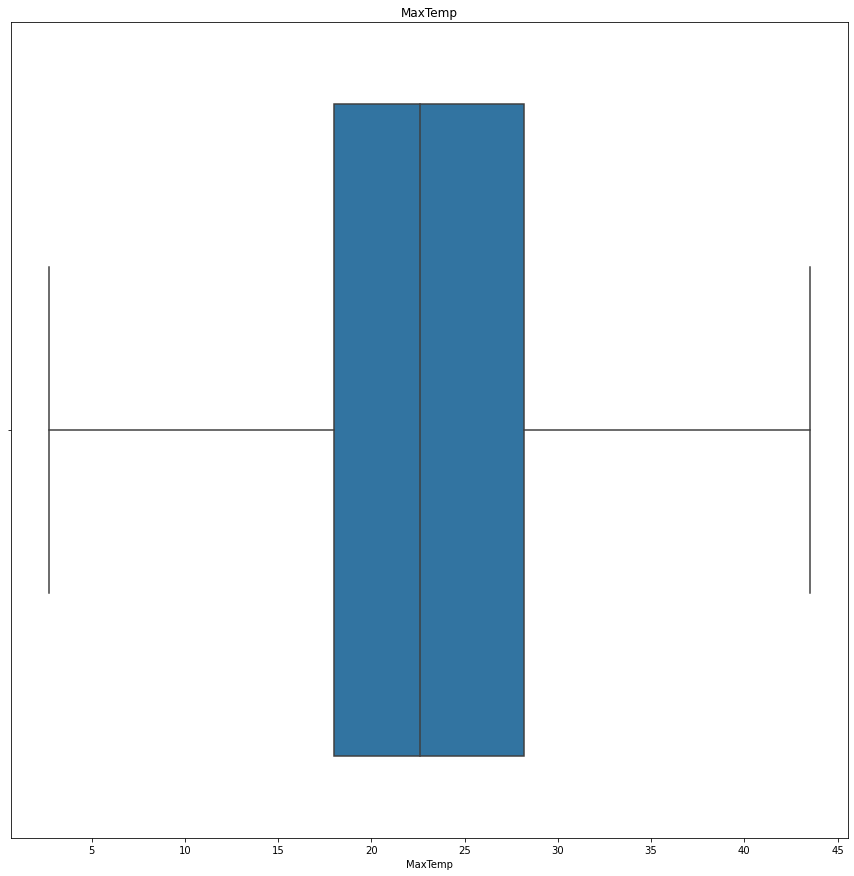

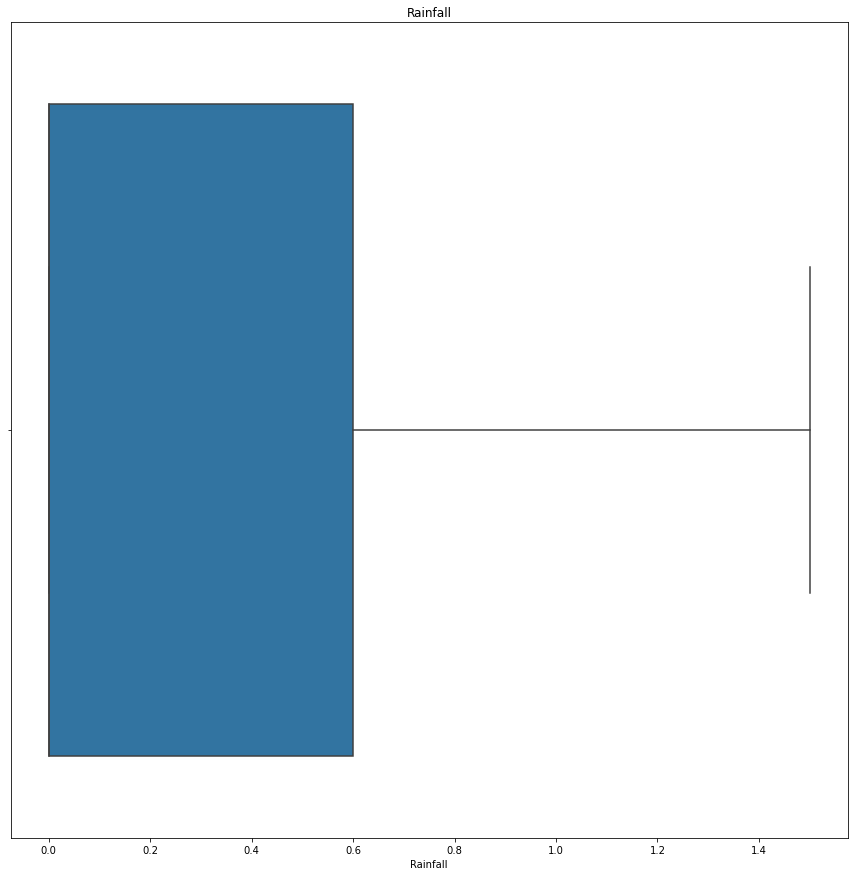

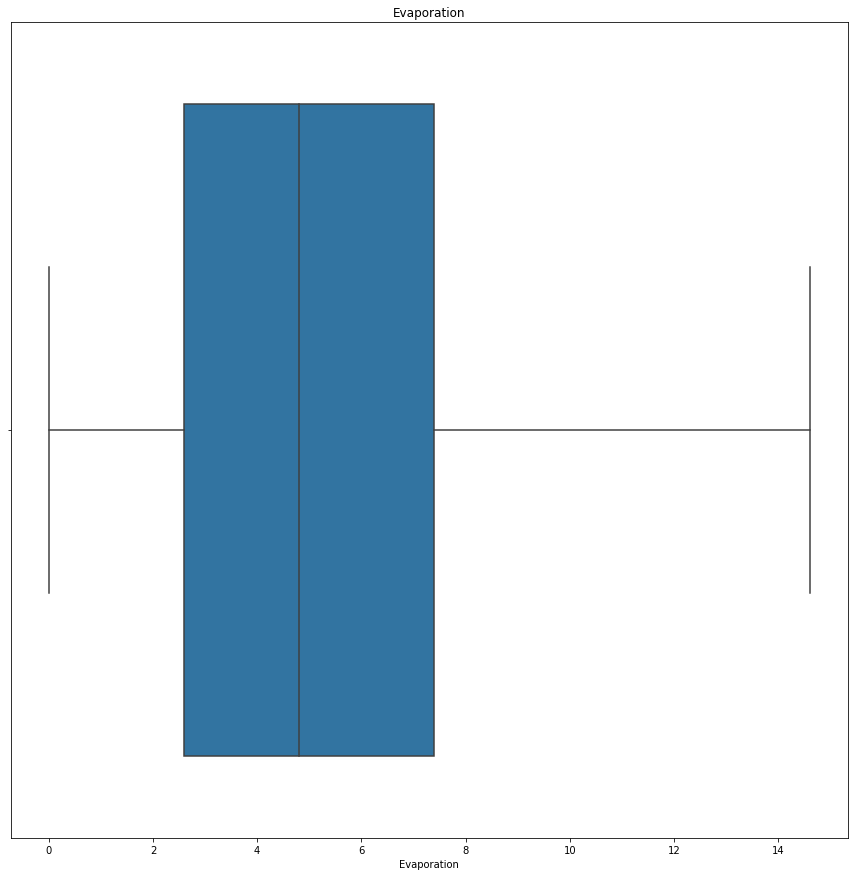

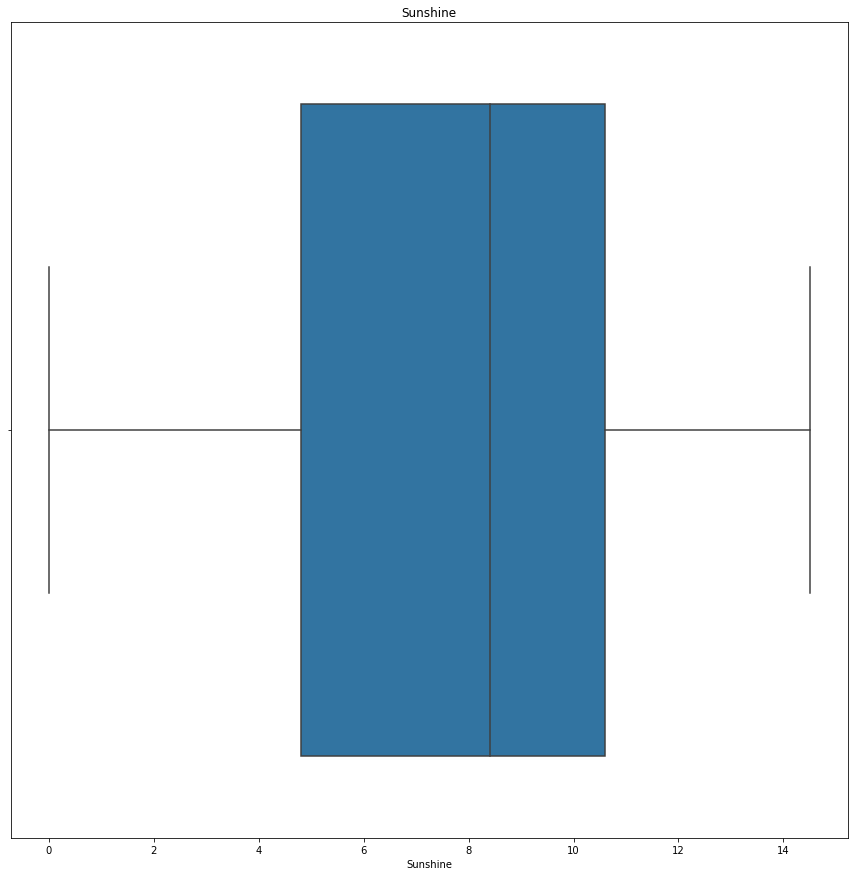

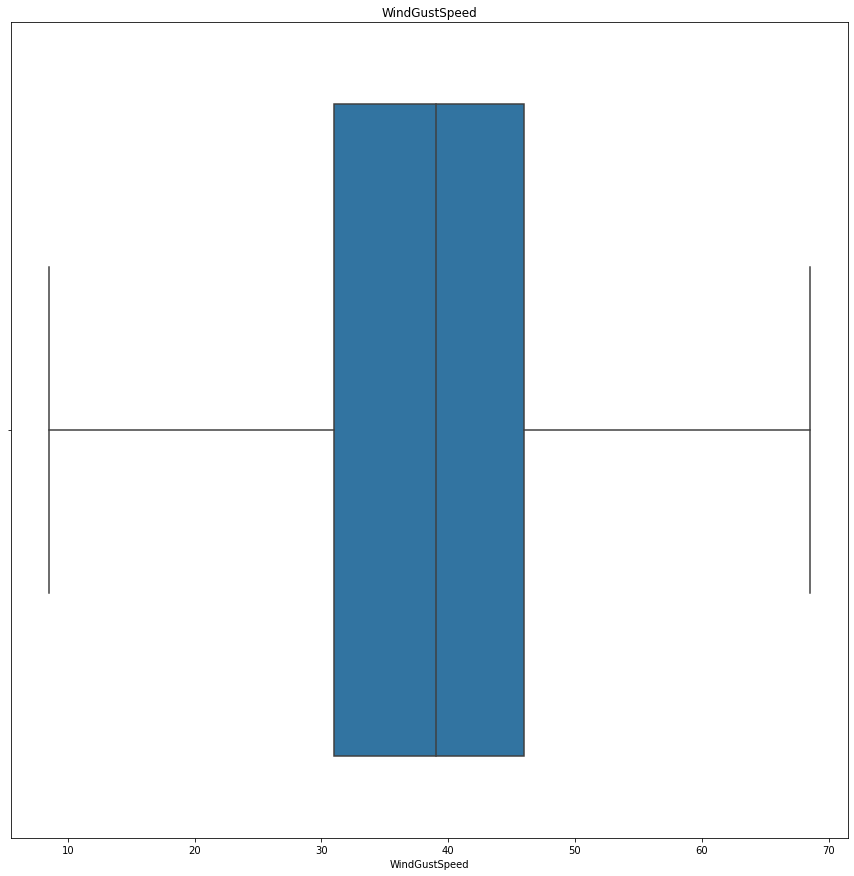

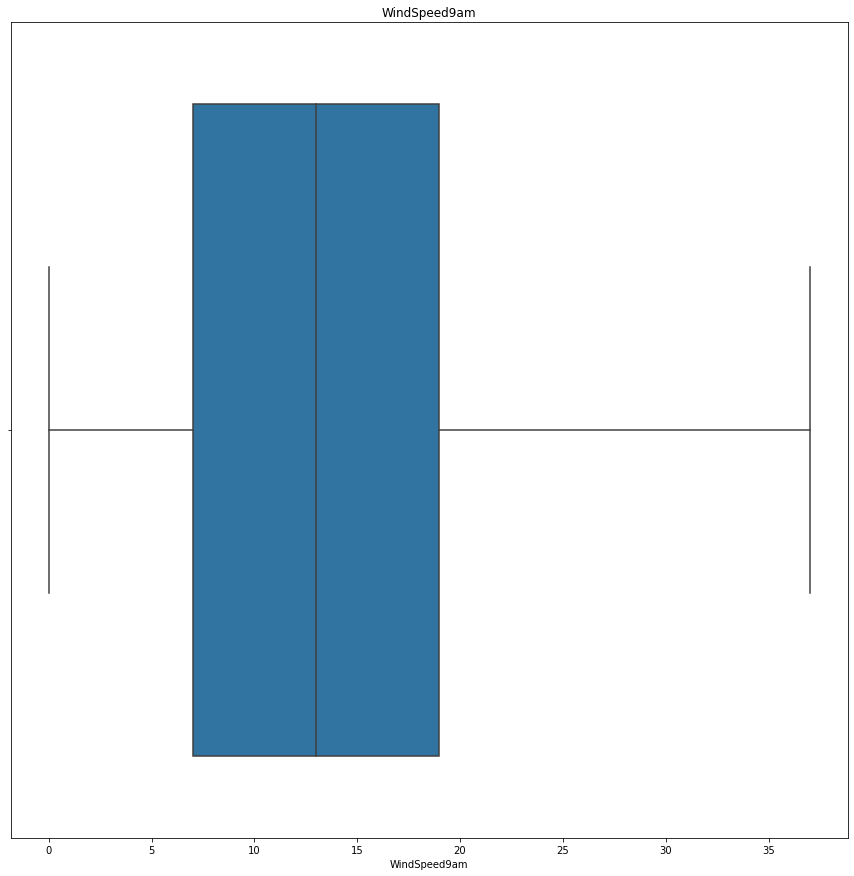

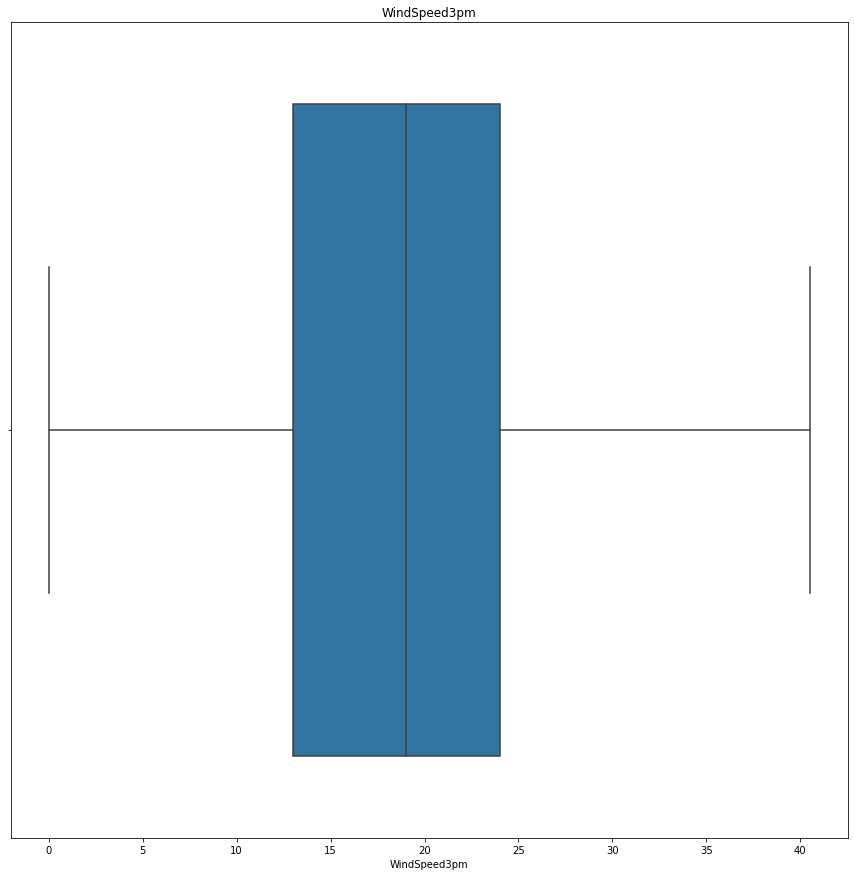

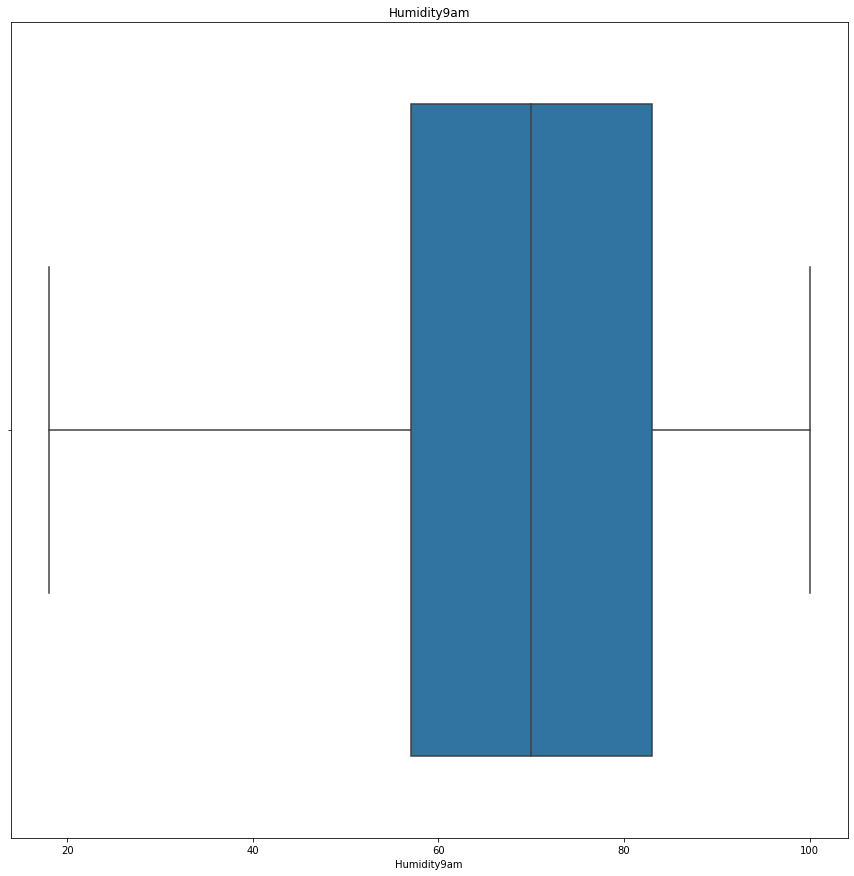

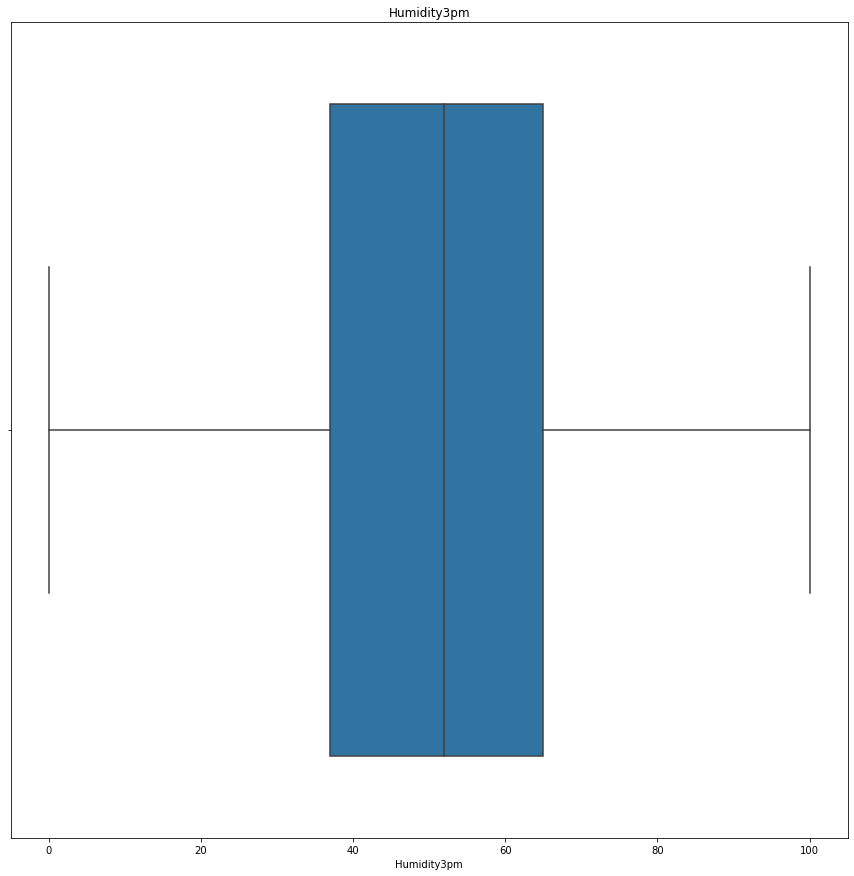

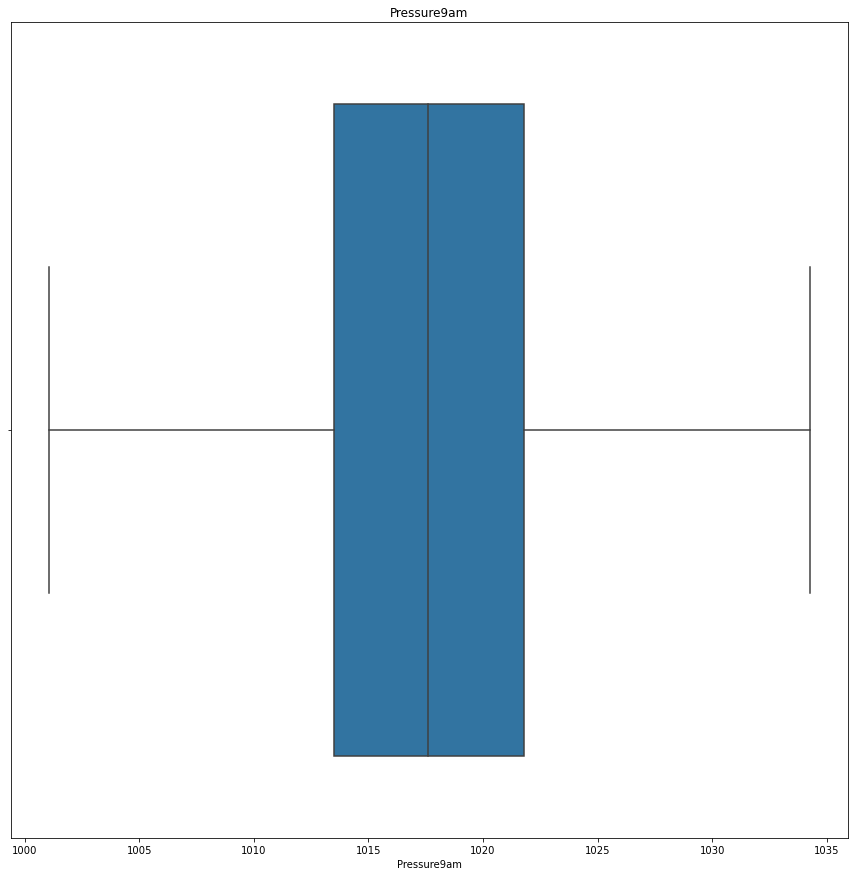

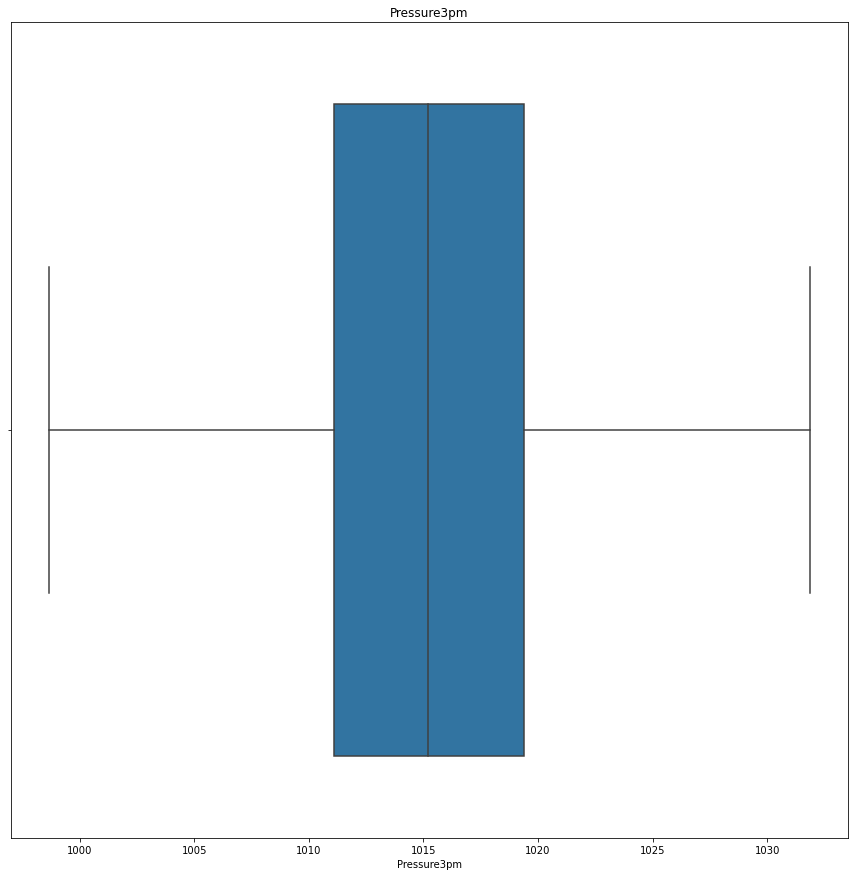

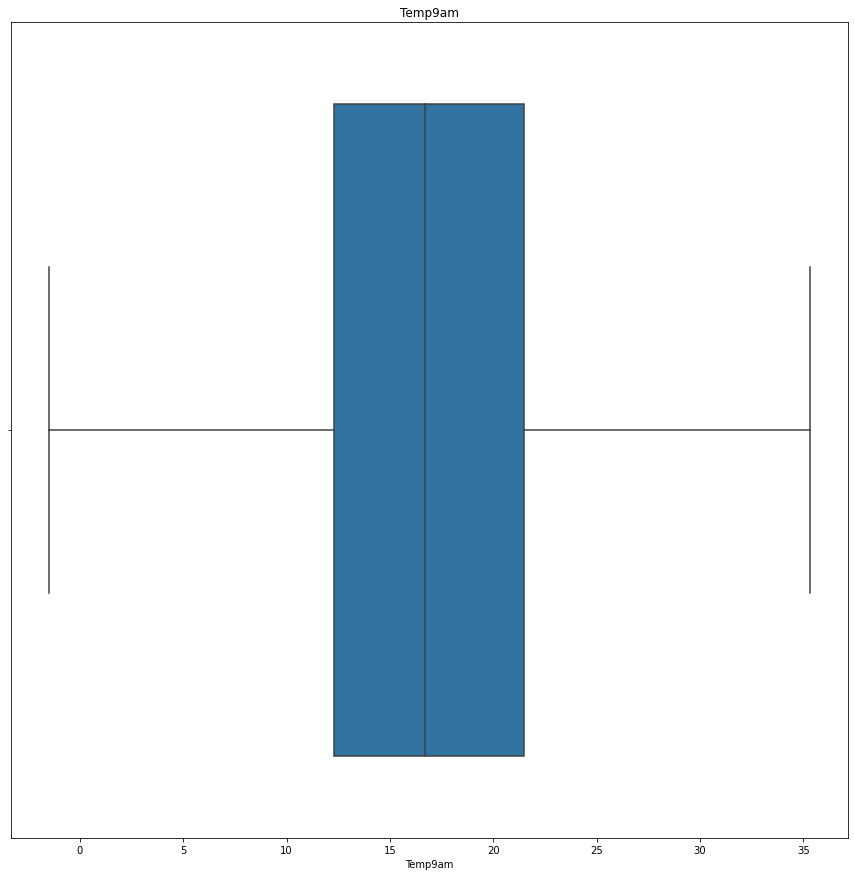

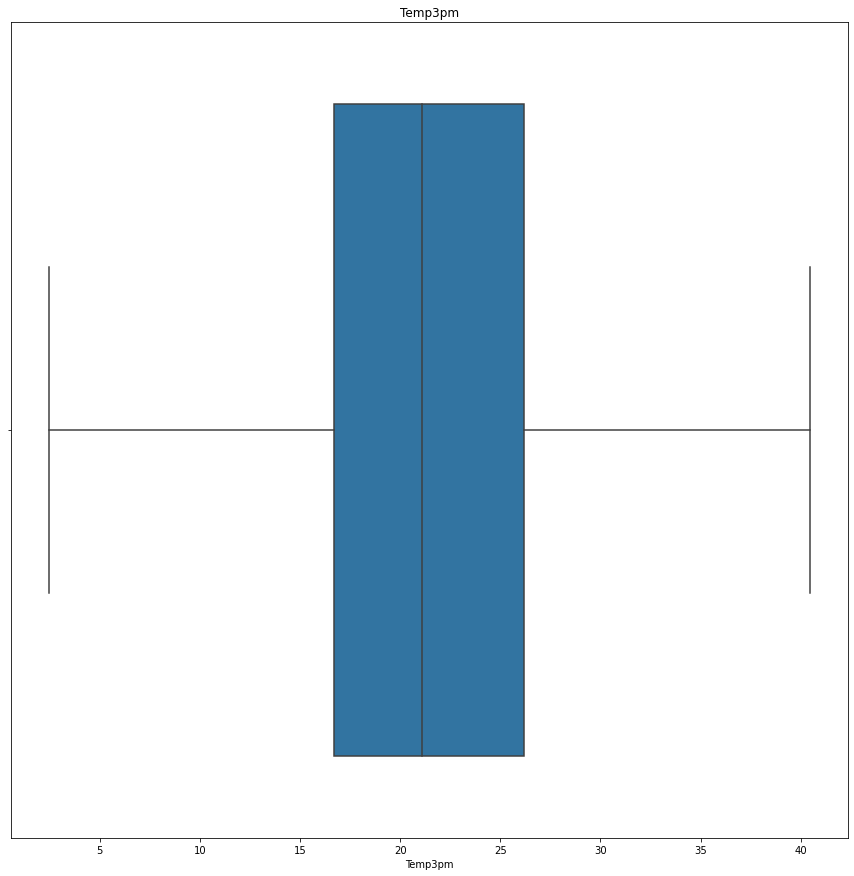

<Figure size 1080x1080 with 0 Axes>

In [54]:
for feature in continous_features:
    df=data.copy()
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [55]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


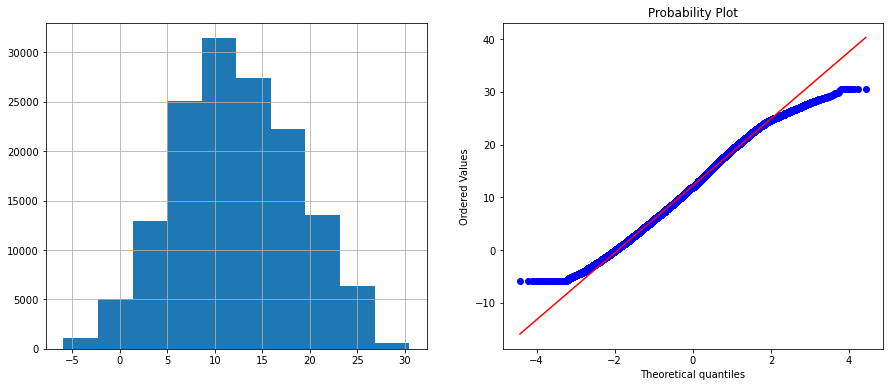

MaxTemp


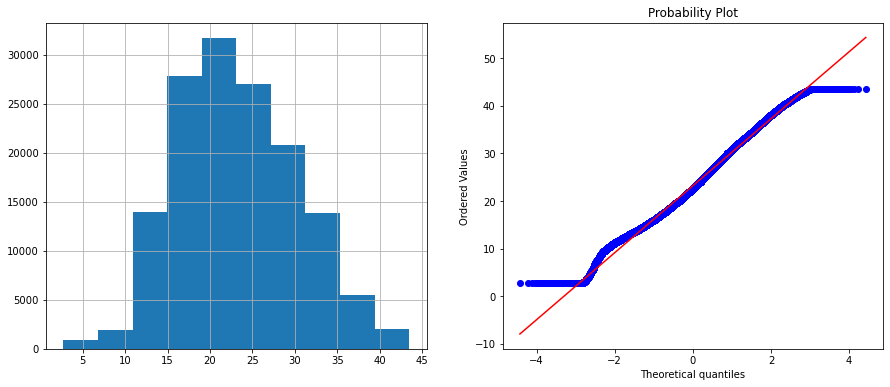

Rainfall


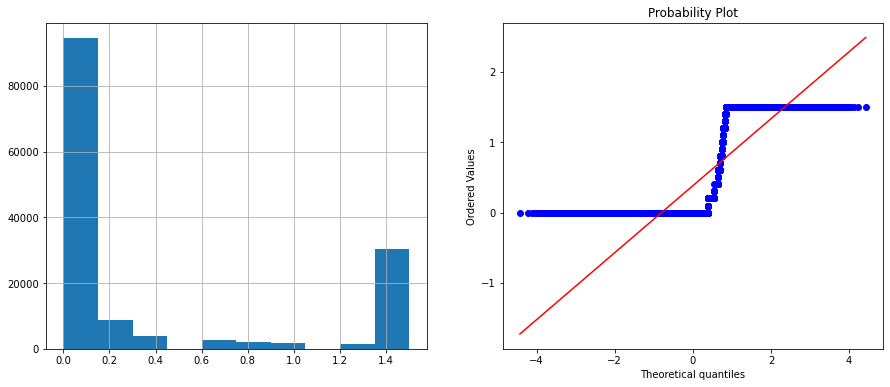

Evaporation


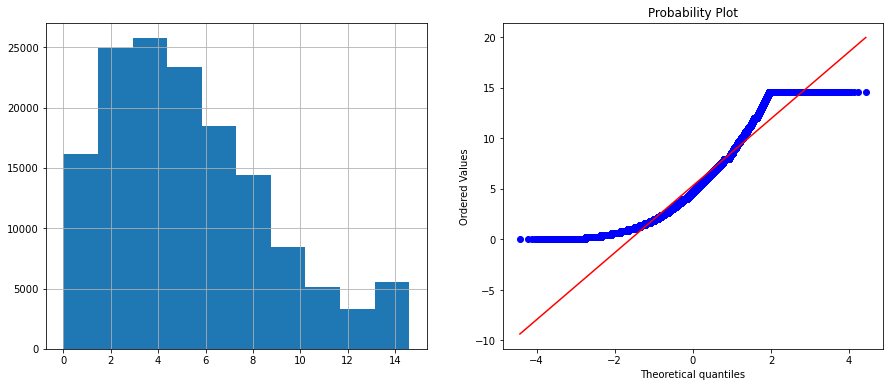

Sunshine


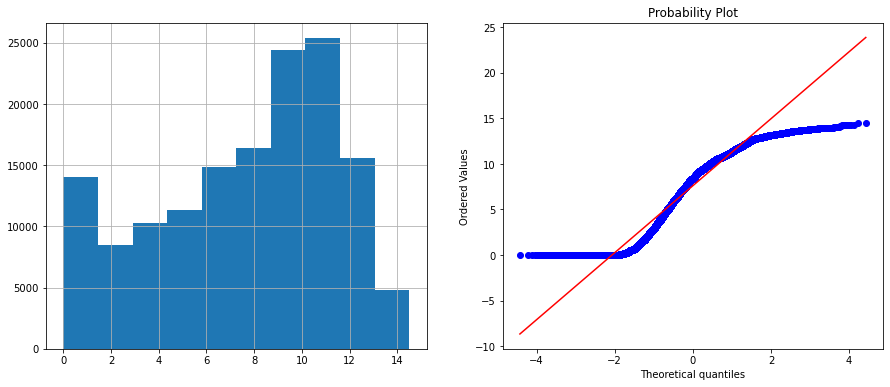

WindGustSpeed


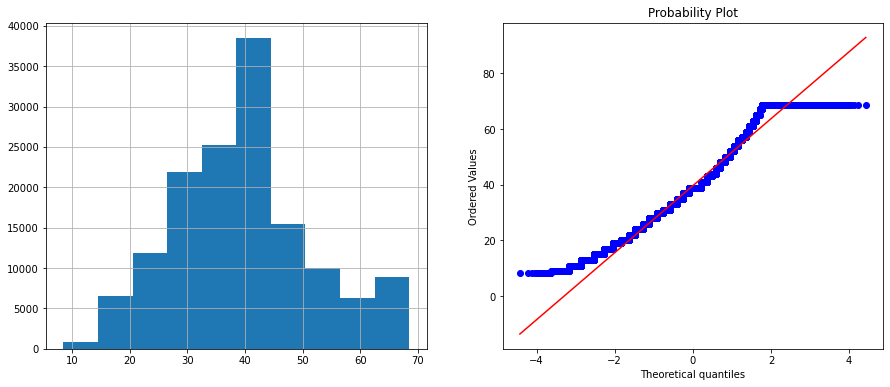

WindSpeed9am


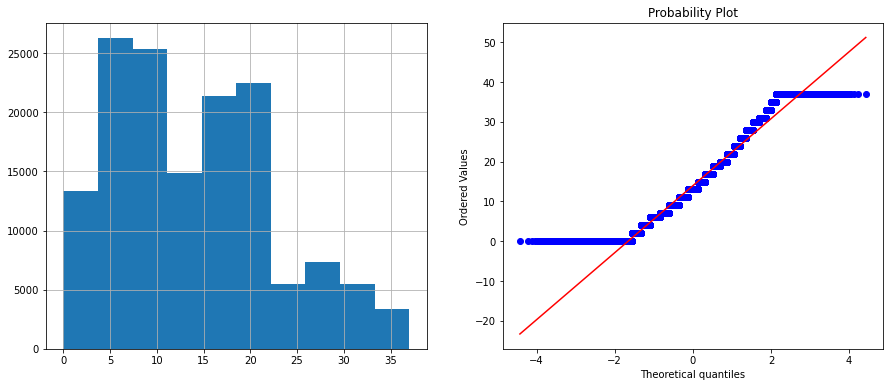

WindSpeed3pm


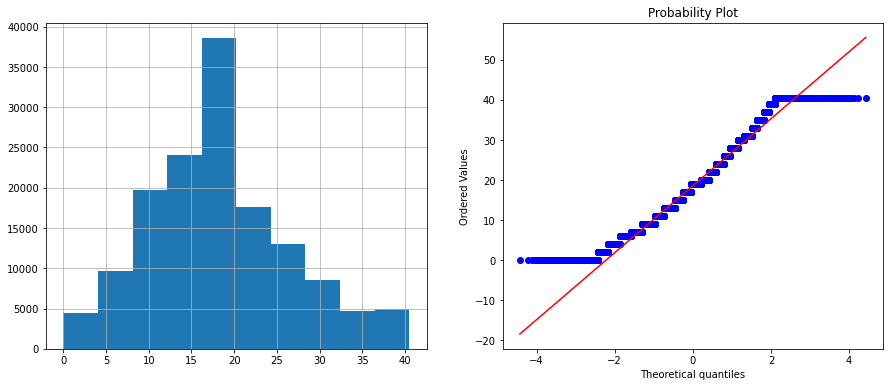

Humidity9am


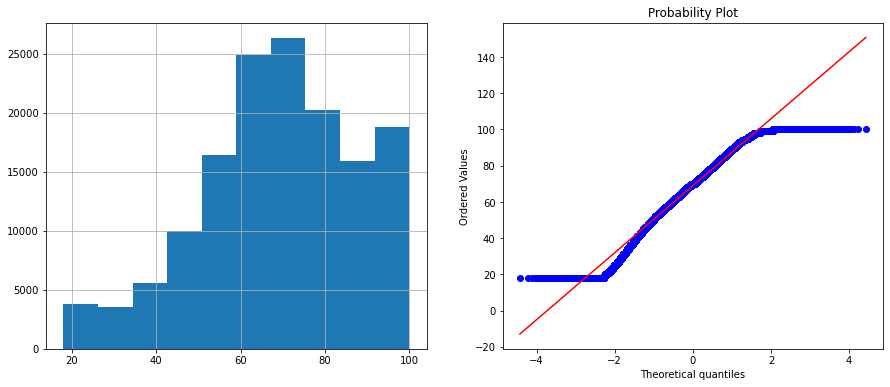

Humidity3pm


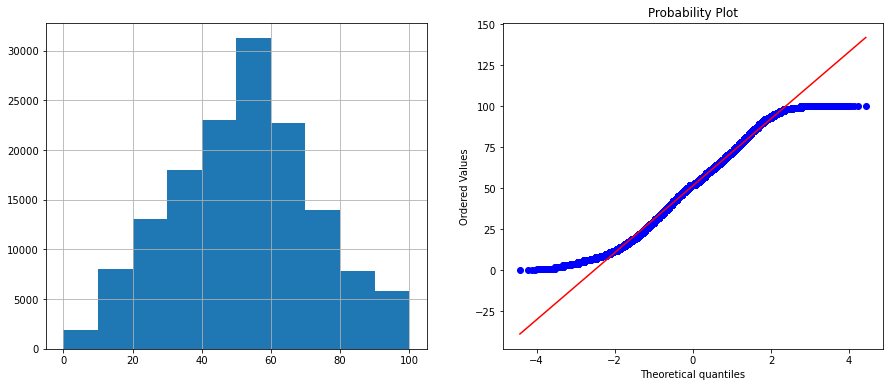

Pressure9am


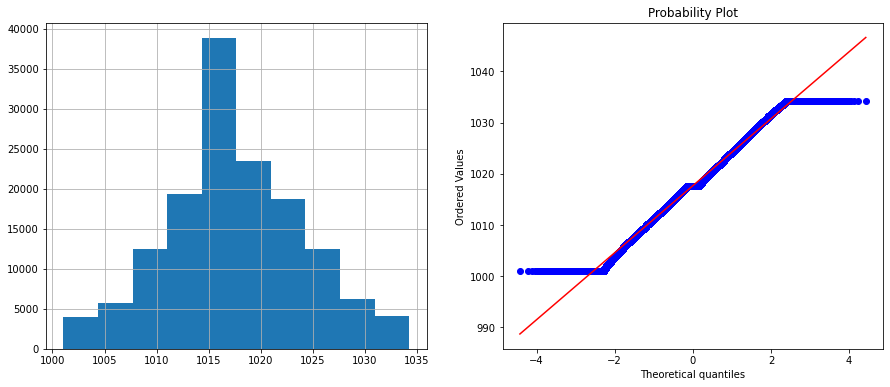

Pressure3pm


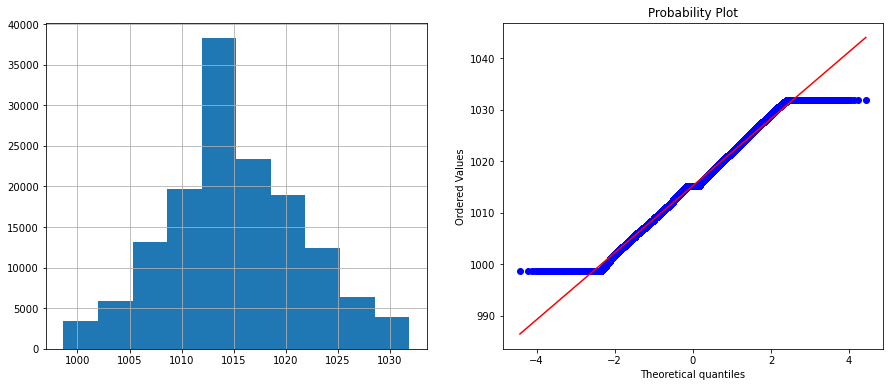

Temp9am


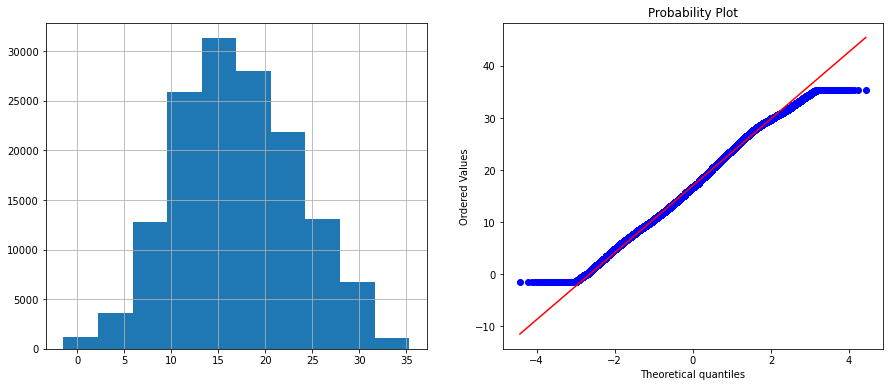

Temp3pm


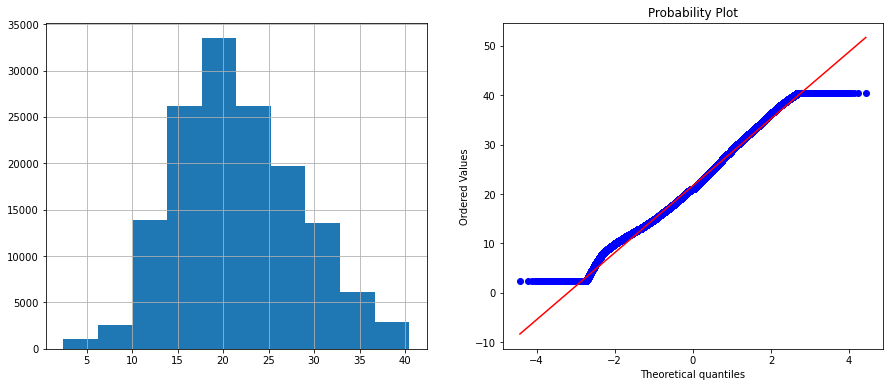

In [56]:
import scipy.stats as stats
for feature in continous_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [57]:
data.to_csv("preprocessed_1.csv", index=False)

In [58]:
# independent and dependent variables
X = data.drop(["RainTomorrow", "Date"], axis=1)  ## date is not used
Y = data["RainTomorrow"]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [60]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [61]:
from collections import Counter
print("The number of classes before fit {}".format(Counter(y_train)))       #check the y_train data whether imbalanced or balanced?

The number of classes before fit Counter({0: 90866, 1: 25502})


In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [63]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 267ms	remaining: 8m 54s
1:	total: 331ms	remaining: 5m 30s
2:	total: 390ms	remaining: 4m 19s
3:	total: 448ms	remaining: 3m 43s
4:	total: 508ms	remaining: 3m 22s
5:	total: 568ms	remaining: 3m 8s
6:	total: 621ms	remaining: 2m 56s
7:	total: 678ms	remaining: 2m 48s
8:	total: 738ms	remaining: 2m 43s
9:	total: 795ms	remaining: 2m 38s
10:	total: 858ms	remaining: 2m 35s
11:	total: 915ms	remaining: 2m 31s
12:	total: 975ms	remaining: 2m 29s
13:	total: 1.03s	remaining: 2m 26s
14:	total: 1.09s	remaining: 2m 24s
15:	total: 1.16s	remaining: 2m 23s
16:	total: 1.22s	remaining: 2m 22s
17:	total: 1.29s	remaining: 2m 22s
18:	total: 1.38s	remaining: 2m 23s
19:	total: 1.44s	remaining: 2m 22s
20:	total: 1.49s	remaining: 2m 20s
21:	total: 1.55s	remaining: 2m 19s
22:	total: 1.61s	remaining: 2m 18s
23:	total: 1.68s	remaining: 2m 18s
24:	total: 1.73s	remaining: 2m 16s
25:	total: 1.79s	remaining: 2m 16s
26:	total: 1.85s	remaining: 2m 15s
27:	total: 1.92s	remaining: 2m 14s
2

238:	total: 16.1s	remaining: 1m 58s
239:	total: 16.2s	remaining: 1m 58s
240:	total: 16.3s	remaining: 1m 59s
241:	total: 16.4s	remaining: 1m 59s
242:	total: 16.5s	remaining: 1m 59s
243:	total: 16.6s	remaining: 1m 59s
244:	total: 16.6s	remaining: 1m 59s
245:	total: 16.7s	remaining: 1m 58s
246:	total: 16.7s	remaining: 1m 58s
247:	total: 16.8s	remaining: 1m 58s
248:	total: 16.9s	remaining: 1m 58s
249:	total: 17s	remaining: 1m 58s
250:	total: 17s	remaining: 1m 58s
251:	total: 17.1s	remaining: 1m 58s
252:	total: 17.1s	remaining: 1m 58s
253:	total: 17.2s	remaining: 1m 58s
254:	total: 17.3s	remaining: 1m 58s
255:	total: 17.3s	remaining: 1m 58s
256:	total: 17.4s	remaining: 1m 58s
257:	total: 17.5s	remaining: 1m 58s
258:	total: 17.6s	remaining: 1m 58s
259:	total: 17.6s	remaining: 1m 58s
260:	total: 17.7s	remaining: 1m 57s
261:	total: 17.8s	remaining: 1m 57s
262:	total: 17.8s	remaining: 1m 57s
263:	total: 17.9s	remaining: 1m 57s
264:	total: 18s	remaining: 1m 57s
265:	total: 18s	remaining: 1m 57s


469:	total: 32s	remaining: 1m 44s
470:	total: 32s	remaining: 1m 43s
471:	total: 32.1s	remaining: 1m 43s
472:	total: 32.1s	remaining: 1m 43s
473:	total: 32.2s	remaining: 1m 43s
474:	total: 32.3s	remaining: 1m 43s
475:	total: 32.3s	remaining: 1m 43s
476:	total: 32.4s	remaining: 1m 43s
477:	total: 32.5s	remaining: 1m 43s
478:	total: 32.5s	remaining: 1m 43s
479:	total: 32.6s	remaining: 1m 43s
480:	total: 32.7s	remaining: 1m 43s
481:	total: 32.7s	remaining: 1m 43s
482:	total: 32.8s	remaining: 1m 43s
483:	total: 32.9s	remaining: 1m 42s
484:	total: 32.9s	remaining: 1m 42s
485:	total: 33s	remaining: 1m 42s
486:	total: 33.1s	remaining: 1m 42s
487:	total: 33.1s	remaining: 1m 42s
488:	total: 33.2s	remaining: 1m 42s
489:	total: 33.2s	remaining: 1m 42s
490:	total: 33.3s	remaining: 1m 42s
491:	total: 33.4s	remaining: 1m 42s
492:	total: 33.4s	remaining: 1m 42s
493:	total: 33.5s	remaining: 1m 42s
494:	total: 33.6s	remaining: 1m 42s
495:	total: 33.7s	remaining: 1m 42s
496:	total: 33.7s	remaining: 1m 41

699:	total: 48.1s	remaining: 1m 29s
700:	total: 48.2s	remaining: 1m 29s
701:	total: 48.2s	remaining: 1m 29s
702:	total: 48.3s	remaining: 1m 29s
703:	total: 48.3s	remaining: 1m 28s
704:	total: 48.4s	remaining: 1m 28s
705:	total: 48.5s	remaining: 1m 28s
706:	total: 48.6s	remaining: 1m 28s
707:	total: 48.7s	remaining: 1m 28s
708:	total: 48.8s	remaining: 1m 28s
709:	total: 48.9s	remaining: 1m 28s
710:	total: 48.9s	remaining: 1m 28s
711:	total: 49s	remaining: 1m 28s
712:	total: 49.1s	remaining: 1m 28s
713:	total: 49.2s	remaining: 1m 28s
714:	total: 49.3s	remaining: 1m 28s
715:	total: 49.4s	remaining: 1m 28s
716:	total: 49.5s	remaining: 1m 28s
717:	total: 49.5s	remaining: 1m 28s
718:	total: 49.6s	remaining: 1m 28s
719:	total: 49.6s	remaining: 1m 28s
720:	total: 49.7s	remaining: 1m 28s
721:	total: 49.9s	remaining: 1m 28s
722:	total: 49.9s	remaining: 1m 28s
723:	total: 50s	remaining: 1m 28s
724:	total: 50.1s	remaining: 1m 28s
725:	total: 50.2s	remaining: 1m 28s
726:	total: 50.3s	remaining: 1m 

932:	total: 1m 3s	remaining: 1m 12s
933:	total: 1m 3s	remaining: 1m 12s
934:	total: 1m 3s	remaining: 1m 12s
935:	total: 1m 3s	remaining: 1m 12s
936:	total: 1m 3s	remaining: 1m 12s
937:	total: 1m 4s	remaining: 1m 12s
938:	total: 1m 4s	remaining: 1m 12s
939:	total: 1m 4s	remaining: 1m 12s
940:	total: 1m 4s	remaining: 1m 12s
941:	total: 1m 4s	remaining: 1m 12s
942:	total: 1m 4s	remaining: 1m 12s
943:	total: 1m 4s	remaining: 1m 11s
944:	total: 1m 4s	remaining: 1m 11s
945:	total: 1m 4s	remaining: 1m 11s
946:	total: 1m 4s	remaining: 1m 11s
947:	total: 1m 4s	remaining: 1m 11s
948:	total: 1m 4s	remaining: 1m 11s
949:	total: 1m 4s	remaining: 1m 11s
950:	total: 1m 4s	remaining: 1m 11s
951:	total: 1m 4s	remaining: 1m 11s
952:	total: 1m 4s	remaining: 1m 11s
953:	total: 1m 5s	remaining: 1m 11s
954:	total: 1m 5s	remaining: 1m 11s
955:	total: 1m 5s	remaining: 1m 11s
956:	total: 1m 5s	remaining: 1m 11s
957:	total: 1m 5s	remaining: 1m 10s
958:	total: 1m 5s	remaining: 1m 10s
959:	total: 1m 5s	remaining:

1160:	total: 1m 19s	remaining: 57.5s
1161:	total: 1m 19s	remaining: 57.4s
1162:	total: 1m 19s	remaining: 57.3s
1163:	total: 1m 19s	remaining: 57.3s
1164:	total: 1m 19s	remaining: 57.2s
1165:	total: 1m 19s	remaining: 57.2s
1166:	total: 1m 20s	remaining: 57.1s
1167:	total: 1m 20s	remaining: 57.1s
1168:	total: 1m 20s	remaining: 57s
1169:	total: 1m 20s	remaining: 56.9s
1170:	total: 1m 20s	remaining: 56.9s
1171:	total: 1m 20s	remaining: 56.9s
1172:	total: 1m 20s	remaining: 56.8s
1173:	total: 1m 20s	remaining: 56.8s
1174:	total: 1m 20s	remaining: 56.7s
1175:	total: 1m 20s	remaining: 56.6s
1176:	total: 1m 20s	remaining: 56.6s
1177:	total: 1m 21s	remaining: 56.6s
1178:	total: 1m 21s	remaining: 56.5s
1179:	total: 1m 21s	remaining: 56.4s
1180:	total: 1m 21s	remaining: 56.4s
1181:	total: 1m 21s	remaining: 56.3s
1182:	total: 1m 21s	remaining: 56.3s
1183:	total: 1m 21s	remaining: 56.2s
1184:	total: 1m 21s	remaining: 56.1s
1185:	total: 1m 21s	remaining: 56s
1186:	total: 1m 21s	remaining: 56s
1187:	t

1384:	total: 1m 39s	remaining: 44s
1385:	total: 1m 39s	remaining: 44s
1386:	total: 1m 39s	remaining: 43.9s
1387:	total: 1m 39s	remaining: 43.8s
1388:	total: 1m 39s	remaining: 43.7s
1389:	total: 1m 39s	remaining: 43.7s
1390:	total: 1m 39s	remaining: 43.6s
1391:	total: 1m 39s	remaining: 43.6s
1392:	total: 1m 39s	remaining: 43.5s
1393:	total: 1m 39s	remaining: 43.4s
1394:	total: 1m 39s	remaining: 43.4s
1395:	total: 1m 40s	remaining: 43.3s
1396:	total: 1m 40s	remaining: 43.2s
1397:	total: 1m 40s	remaining: 43.2s
1398:	total: 1m 40s	remaining: 43.2s
1399:	total: 1m 40s	remaining: 43.2s
1400:	total: 1m 40s	remaining: 43.1s
1401:	total: 1m 40s	remaining: 43.1s
1402:	total: 1m 41s	remaining: 43s
1403:	total: 1m 41s	remaining: 42.9s
1404:	total: 1m 41s	remaining: 42.9s
1405:	total: 1m 41s	remaining: 42.8s
1406:	total: 1m 41s	remaining: 42.7s
1407:	total: 1m 41s	remaining: 42.7s
1408:	total: 1m 41s	remaining: 42.6s
1409:	total: 1m 41s	remaining: 42.5s
1410:	total: 1m 41s	remaining: 42.4s
1411:	t

1607:	total: 1m 57s	remaining: 28.6s
1608:	total: 1m 57s	remaining: 28.5s
1609:	total: 1m 57s	remaining: 28.4s
1610:	total: 1m 57s	remaining: 28.3s
1611:	total: 1m 57s	remaining: 28.3s
1612:	total: 1m 57s	remaining: 28.2s
1613:	total: 1m 57s	remaining: 28.1s
1614:	total: 1m 57s	remaining: 28.1s
1615:	total: 1m 57s	remaining: 28s
1616:	total: 1m 57s	remaining: 27.9s
1617:	total: 1m 57s	remaining: 27.8s
1618:	total: 1m 58s	remaining: 27.8s
1619:	total: 1m 58s	remaining: 27.7s
1620:	total: 1m 58s	remaining: 27.6s
1621:	total: 1m 58s	remaining: 27.6s
1622:	total: 1m 58s	remaining: 27.5s
1623:	total: 1m 58s	remaining: 27.4s
1624:	total: 1m 58s	remaining: 27.3s
1625:	total: 1m 58s	remaining: 27.3s
1626:	total: 1m 58s	remaining: 27.2s
1627:	total: 1m 58s	remaining: 27.1s
1628:	total: 1m 58s	remaining: 27.1s
1629:	total: 1m 58s	remaining: 27s
1630:	total: 1m 58s	remaining: 26.9s
1631:	total: 1m 59s	remaining: 26.8s
1632:	total: 1m 59s	remaining: 26.8s
1633:	total: 1m 59s	remaining: 26.7s
1634:

1837:	total: 2m 14s	remaining: 11.8s
1838:	total: 2m 14s	remaining: 11.7s
1839:	total: 2m 14s	remaining: 11.7s
1840:	total: 2m 14s	remaining: 11.6s
1841:	total: 2m 14s	remaining: 11.5s
1842:	total: 2m 14s	remaining: 11.4s
1843:	total: 2m 14s	remaining: 11.4s
1844:	total: 2m 14s	remaining: 11.3s
1845:	total: 2m 14s	remaining: 11.2s
1846:	total: 2m 14s	remaining: 11.2s
1847:	total: 2m 14s	remaining: 11.1s
1848:	total: 2m 14s	remaining: 11s
1849:	total: 2m 14s	remaining: 10.9s
1850:	total: 2m 14s	remaining: 10.9s
1851:	total: 2m 14s	remaining: 10.8s
1852:	total: 2m 15s	remaining: 10.7s
1853:	total: 2m 15s	remaining: 10.6s
1854:	total: 2m 15s	remaining: 10.6s
1855:	total: 2m 15s	remaining: 10.5s
1856:	total: 2m 15s	remaining: 10.4s
1857:	total: 2m 15s	remaining: 10.3s
1858:	total: 2m 15s	remaining: 10.3s
1859:	total: 2m 15s	remaining: 10.2s
1860:	total: 2m 15s	remaining: 10.1s
1861:	total: 2m 15s	remaining: 10.1s
1862:	total: 2m 15s	remaining: 9.98s
1863:	total: 2m 15s	remaining: 9.91s
186

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21518  1199]
 [ 2783  3592]]
0.863123882854393
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



0.7553355619485105

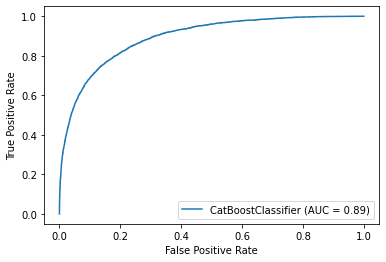

In [66]:
from sklearn import metrics

metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [68]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20642  2075]
 [ 2489  3886]]
0.8431183830606352
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



0.7591136705947951

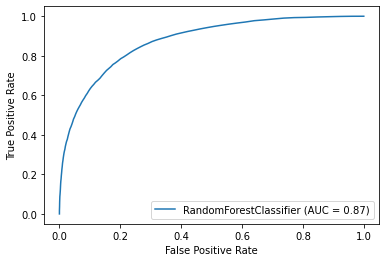

In [69]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\SURESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17663  5054]
 [ 1537  4838]]
0.7734428708923415
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     22717
           1       0.49      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



0.7682127006897314

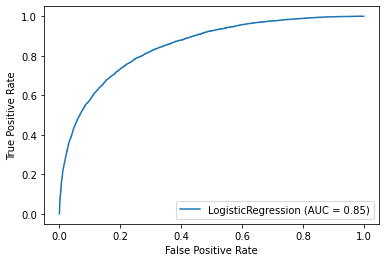

In [72]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [74]:

y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17078  5639]
 [ 1661  4714]]
0.7490719098033823
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     22717
           1       0.46      0.74      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.7456113906230715

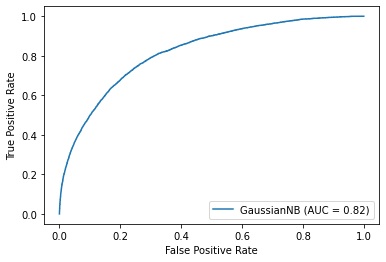

In [75]:

metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [77]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17306  5411]
 [ 1770  4605]]
0.7531623814106971
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22717
           1       0.46      0.72      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.70     29092
weighted avg       0.81      0.75      0.77     29092



0.7420806392724806

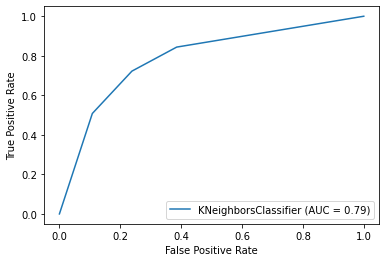

In [78]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

C:\Users\SURESH\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21377  1340]
 [ 2831  3544]]
0.8566272514780696
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.73      0.56      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



C:\Users\SURESH\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.74846745332812

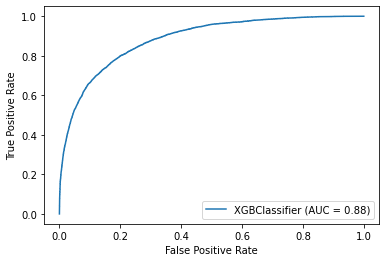

In [81]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)

In [82]:
# pip install svm

In [83]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train_res, y_train_res)

In [84]:
# y_pred5 = svc.predict(X_test)
# print(confusion_matrix(y_test,y_pred5))
# print(accuracy_score(y_test,y_pred5))
# print(classification_report(y_test,y_pred5))

In [85]:
# from sklearn import metrics
# metrics.plot_roc_curve(svc, X_test, y_test)
# metrics.roc_auc_score(y_test, y_pred5, average=None)

In [86]:
import joblib

joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
# joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

## pycaret lib model check

In [93]:
import pycaret
data = pd.read_csv('preprocessed_1.csv')
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Date_month       0
Date_day         0
dtype: int64

In [94]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'RainTomorrow')

,Description,Value
0,session_id,7830
1,Target,RainTomorrow
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(145460, 25)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [95]:
# return best model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8606,0.8908,0.5413,0.7583,0.6317,0.5486,0.5605,31.4910
xgboost,Extreme Gradient Boosting,0.8565,0.8852,0.5419,0.7388,0.6252,0.5390,0.5489,9.7540
lightgbm,Light Gradient Boosting Machine,0.8536,0.8806,0.5138,0.7443,0.6079,0.5216,0.5352,1.2420
rf,Random Forest Classifier,0.8518,0.8747,0.4741,0.7655,0.5855,0.5013,0.5226,11.0300
et,Extra Trees Classifier,0.8495,0.8764,0.4458,0.7782,0.5668,0.4838,0.5113,11.5060
gbc,Gradient Boosting Classifier,0.8473,0.8654,0.4807,0.7363,0.5816,0.4932,0.5100,17.6250
ada,Ada Boost Classifier,0.8410,0.8529,0.4720,0.7108,0.5672,0.4746,0.4896,3.6330
lda,Linear Discriminant Analysis,0.8404,0.8563,0.4991,0.6924,0.5800,0.4847,0.4946,0.6510
lr,Logistic Regression,0.8396,0.8539,0.4691,0.7061,0.5636,0.4702,0.4850,10.0930
ridge,Ridge Classifier,0.8391,0.0000,0.4274,0.7328,0.5398,0.4504,0.4745,0.1070
